# EDA for round 5 trading data



## Assumptions that need the data to speak out?

- for certiain trader names, they have better performace than others(i.e informed traders), so we copy trading their trades and stop doing counterpart trades with them
- for certain trader species, they have better performace than others(i.e informed traders), so we copy trading their trades and stop doing counterpart trades with them
- for certain trade species, they have information for certain underlying that is not available to others, so we copy trading their trades and stop doing counterpart trades with them when we are trading certain goods

The performance can be measured by their volumed average price to sell a certain good - the volume weighted average price of the same good in the market.

In [3]:
# load libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.max_rows', 50000)
pd.set_option('display.max_columns', 50000)
pd.set_option('display.width', 100000)


In [32]:
trades = pd.read_csv(r'C:\Users\ayush\Desktop\IITB\IMCP_2\round-5-island-data-bottle\trades_round_3_day_2_wn.csv', sep=';')
prices = pd.read_csv(r'C:\Users\ayush\Desktop\IITB\IMCP_2\round-5-island-data-bottle\prices_round_3_day_2.csv',sep=';')


In [33]:
trades.head()

,timestamp,buyer,seller,symbol,currency,price,quantity
0,0,Vinnie,Remy,CHOCOLATE,SEASHELLS,7888.0,8
1,200,Remy,Vinnie,STRAWBERRIES,SEASHELLS,4038.0,7
2,200,Remy,Vinnie,CHOCOLATE,SEASHELLS,7891.0,8
3,600,Remy,Vinnie,CHOCOLATE,SEASHELLS,7890.0,5
4,700,Vinnie,Vladimir,STRAWBERRIES,SEASHELLS,4037.0,3


In [34]:
# trades['quantity'].describe()

In [35]:
prices.head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,2,0,ROSES,14421,27,14420.0,35.0,NaN,NaN,14422,62,NaN,NaN,NaN,NaN,14421.5,0.0
1,2,0,STRAWBERRIES,4036,255,NaN,NaN,NaN,NaN,4037,255,NaN,NaN,NaN,NaN,4036.5,0.0
2,2,0,CHOCOLATE,7888,123,NaN,NaN,NaN,NaN,7890,123,NaN,NaN,NaN,NaN,7889.0,0.0
3,2,0,GIFT_BASKET,70593,1,70592.0,10.0,70591.0,27.0,70604,1,70605.0,10.0,70606.0,27.0,70598.5,0.0
4,2,100,CHOCOLATE,7889,102,NaN,NaN,NaN,NaN,7890,48,7891.0,54.0,NaN,NaN,7889.5,0.0


In [36]:
def plot_market_part(trade_df):
    buy = trade_df['buyer'].value_counts()
    sell = trade_df['seller'].value_counts()

    plt.figure(figsize=(10, 5))
    plt.title('Market trades value count by participants')
    plt.bar(buy.index, buy.values, label='Buyers',alpha = 0.5, color = 'green')
    plt.bar(sell.index, sell.values, label='Sellers',alpha = 0.5, color = 'red')
    # attach the value labels to the bars
    for i in range(len(buy)):
        plt.text(buy.index[i], buy.values[i], buy.values[i], ha='center', va='bottom',color='green')
    for i in range(len(sell)):
        plt.text(sell.index[i], sell.values[i], sell.values[i], ha='center', va='bottom',color='red')
    plt.show()

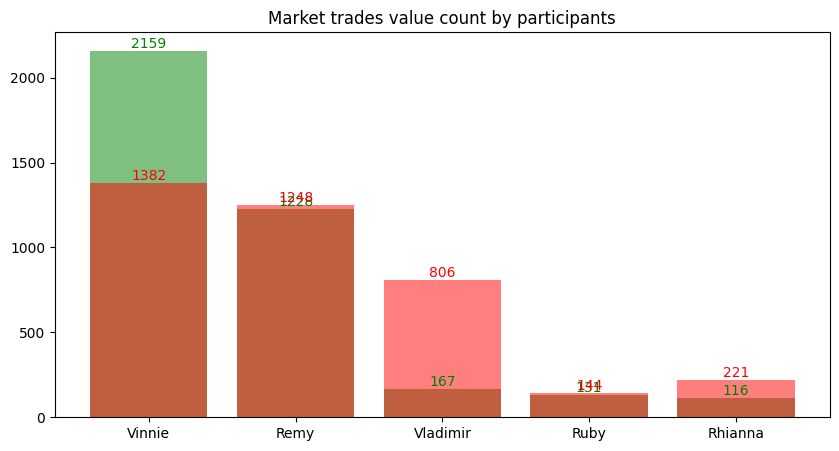

In [37]:

plot_market_part(trades)

In [38]:
species = trades['buyer'].value_counts()
print(species)

buyer
Vinnie      2159
Remy        1228
Vladimir     167
Ruby         131
Rhianna      116
Name: count, dtype: int64


In [39]:
species_dict = {
    "Valentina": "V",
    "Vinnie": "V",
    "Vladimir": "V",
    "Vivian": "V",
    "Celeste": "C",
    "Colin": "C",
    "Carlos": "C",
    "Camilla": "C",
    "Pablo": "P",
    "Penelope": "P",
    "Percy": "P",
    "Petunia": "P",
    "Ruby": "R",
    "Remy": "R",
    "Rihanna": "R",
    "Raj": "R",
    "Amelia": "A",
    "Adam": "A",
    "Alina": "A",
    "Amir": "A"
}

print(species_dict)


{'Valentina': 'V', 'Vinnie': 'V', 'Vladimir': 'V', 'Vivian': 'V', 'Celeste': 'C', 'Colin': 'C', 'Carlos': 'C', 'Camilla': 'C', 'Pablo': 'P', 'Penelope': 'P', 'Percy': 'P', 'Petunia': 'P', 'Ruby': 'R', 'Remy': 'R', 'Rihanna': 'R', 'Raj': 'R', 'Amelia': 'A', 'Adam': 'A', 'Alina': 'A', 'Amir': 'A'}


In [40]:
def generate_participant_species(trade_df):
    trade_df['buyer_species'] = trade_df['buyer'].map(species_dict)
    trade_df['seller_species'] = trade_df['seller'].map(species_dict)
    return trade_df.copy()


In [41]:
trades = trades.pipe(generate_participant_species)

In [42]:
def plot_market_part_kind(trade_df,pct = 1):
    buy = trade_df['buyer_species'].value_counts()
    sell = trade_df['seller_species'].value_counts()

    plt.figure(figsize=(10, 5))
    if pct ==0:
        plt.title('Market trades value count by participants species')
    else:
        plt.title("Market participant species percentage")
    plt.bar(buy.index, buy.values, label='Buyers',alpha = 0.5, color = 'green')
    plt.bar(sell.index, sell.values, label='Sellers',alpha = 0.5, color = 'red')
    # attach the value labels to the bars
    # attach the percentage labels to the bars
    if pct == 0:
        for i in range(len(buy)):
            plt.text(buy.index[i], buy.values[i], buy.values[i], ha='right', va='top',color='green')
        for i in range(len(sell)):
            plt.text(sell.index[i], sell.values[i], sell.values[i], ha='right', va='bottom',color='red')
    else:
        for i in range(len(buy)):
            plt.text(buy.index[i], buy.values[i], str(round(buy.values[i]/buy.values.sum()*100,2))+'%', ha='left', va='top',color='green')
        for i  in range(len(sell)):
            plt.text(sell.index[i], sell.values[i], str(round(sell.values[i]/sell.values.sum()*100,2))+'%', ha='left', va='bottom',color='red')
    
    plt.show()


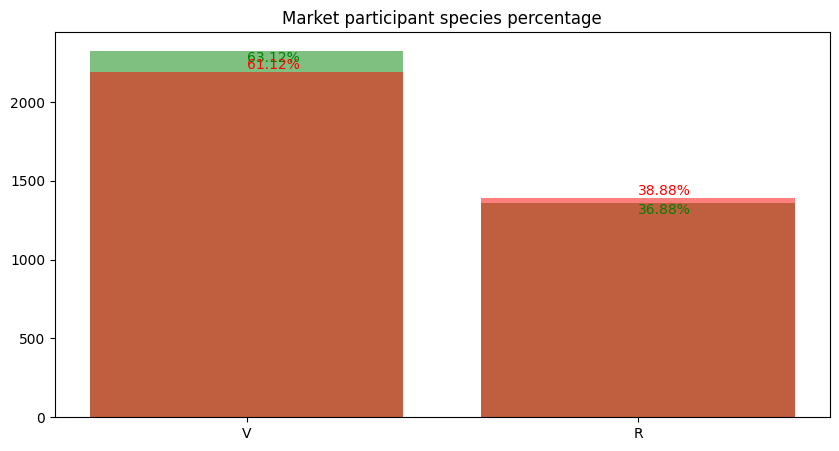

In [43]:
trades.pipe(plot_market_part_kind)


In [44]:
def generate_pnl(trade_df,price_df,trader):
    temp = trade_df[(trade_df['buyer']==trader) | (trade_df['seller']==trader)]
    if len(temp['symbol'].unique()) == 0:
        print('No trades for '+trader)
        return

    else:
            
        fig, axs = plt.subplots(len(temp['symbol'].unique()),1,figsize=(10, 2*len(temp['symbol'].unique())))
        fig.suptitle('PnL for '+trader)
        
        for ticker in temp['symbol'].unique():
            
            ticker_pos = 0

            temp_ticker = temp[temp['symbol']==ticker]
            # initialize position
            temp_ticker['position_delta'] = temp_ticker['quantity']*(temp_ticker['buyer']==trader).astype(int)*2-1 # 1 for buy, -1 for sell
            temp_ticker['position'] = temp_ticker['position_delta'].cumsum()

            # we merge the price df to get the mid price for each trade
            temp_ticker = temp_ticker.merge(price_df[['product','timestamp','mid_price']],left_on=['symbol','timestamp'], right_on = ['product','timestamp'],how='left')

            temp_ticker['position'] = temp_ticker['position'].fillna(method='ffill')
            temp_ticker['balance'] = temp_ticker['position'] * temp_ticker['mid_price']
            temp_ticker['balance'] = temp_ticker['balance']+(temp_ticker['price']-temp_ticker['mid_price'])*temp_ticker['position_delta']
            # if we add long witha price higher than the mid price, we are losing money
            
            ax = axs[temp['symbol'].unique().tolist().index(ticker)] if len(temp['symbol'].unique())>1 else axs
            ax.plot(temp_ticker['timestamp'],temp_ticker['balance'])
            ax.set_title(ticker)
        plt.show()
        return 


def generate_pnl_for_each_product(trade_df,price_df):

    product_count = len(trade_df['symbol'].unique())
    fig, axs = plt.subplots(product_count,1,figsize=(20, 6*product_count))
    fig.suptitle('PnL for each product')

    for product in price_df['product'].unique():
        ax = axs[price_df['product'].unique().tolist().index(product)-1]
        ax.set_title(product)

        temp = trade_df[trade_df['symbol']==product]

        temp_trader_ls = temp['buyer'].unique().tolist()+temp['seller'].unique().tolist()
        temp_trader_ls = list(set(temp_trader_ls))


        for trader in temp_trader_ls:
            
            ticker_pos = 0
            temp_ticker = temp[(temp['buyer']==trader) | (temp['seller']==trader)]

            temp_ticker['position_delta'] = temp_ticker['quantity']*(temp_ticker['buyer']==trader).astype(int)*2-1 # 1 for buy, -1 for sell
            temp_ticker['position'] = temp_ticker['position_delta'].cumsum()

            # we merge the price df to get the mid price for each trade
            temp_ticker = temp_ticker.merge(price_df[['product','timestamp','mid_price']],left_on=['symbol','timestamp'], right_on = ['product','timestamp'],how='left')
            temp_ticker['position'] = temp_ticker['position'].fillna(method='ffill')
            temp_ticker['balance'] = temp_ticker['position'] * temp_ticker['mid_price']
            temp_ticker['balance'] = temp_ticker['balance']+(temp_ticker['price']-temp_ticker['mid_price'])*temp_ticker['position_delta']
            # if we add long witha price higher than the mid price, we are losing money
            ax.plot(temp_ticker['timestamp'],temp_ticker['balance'],label=trader)
            ax.legend()
    plt.show()


    

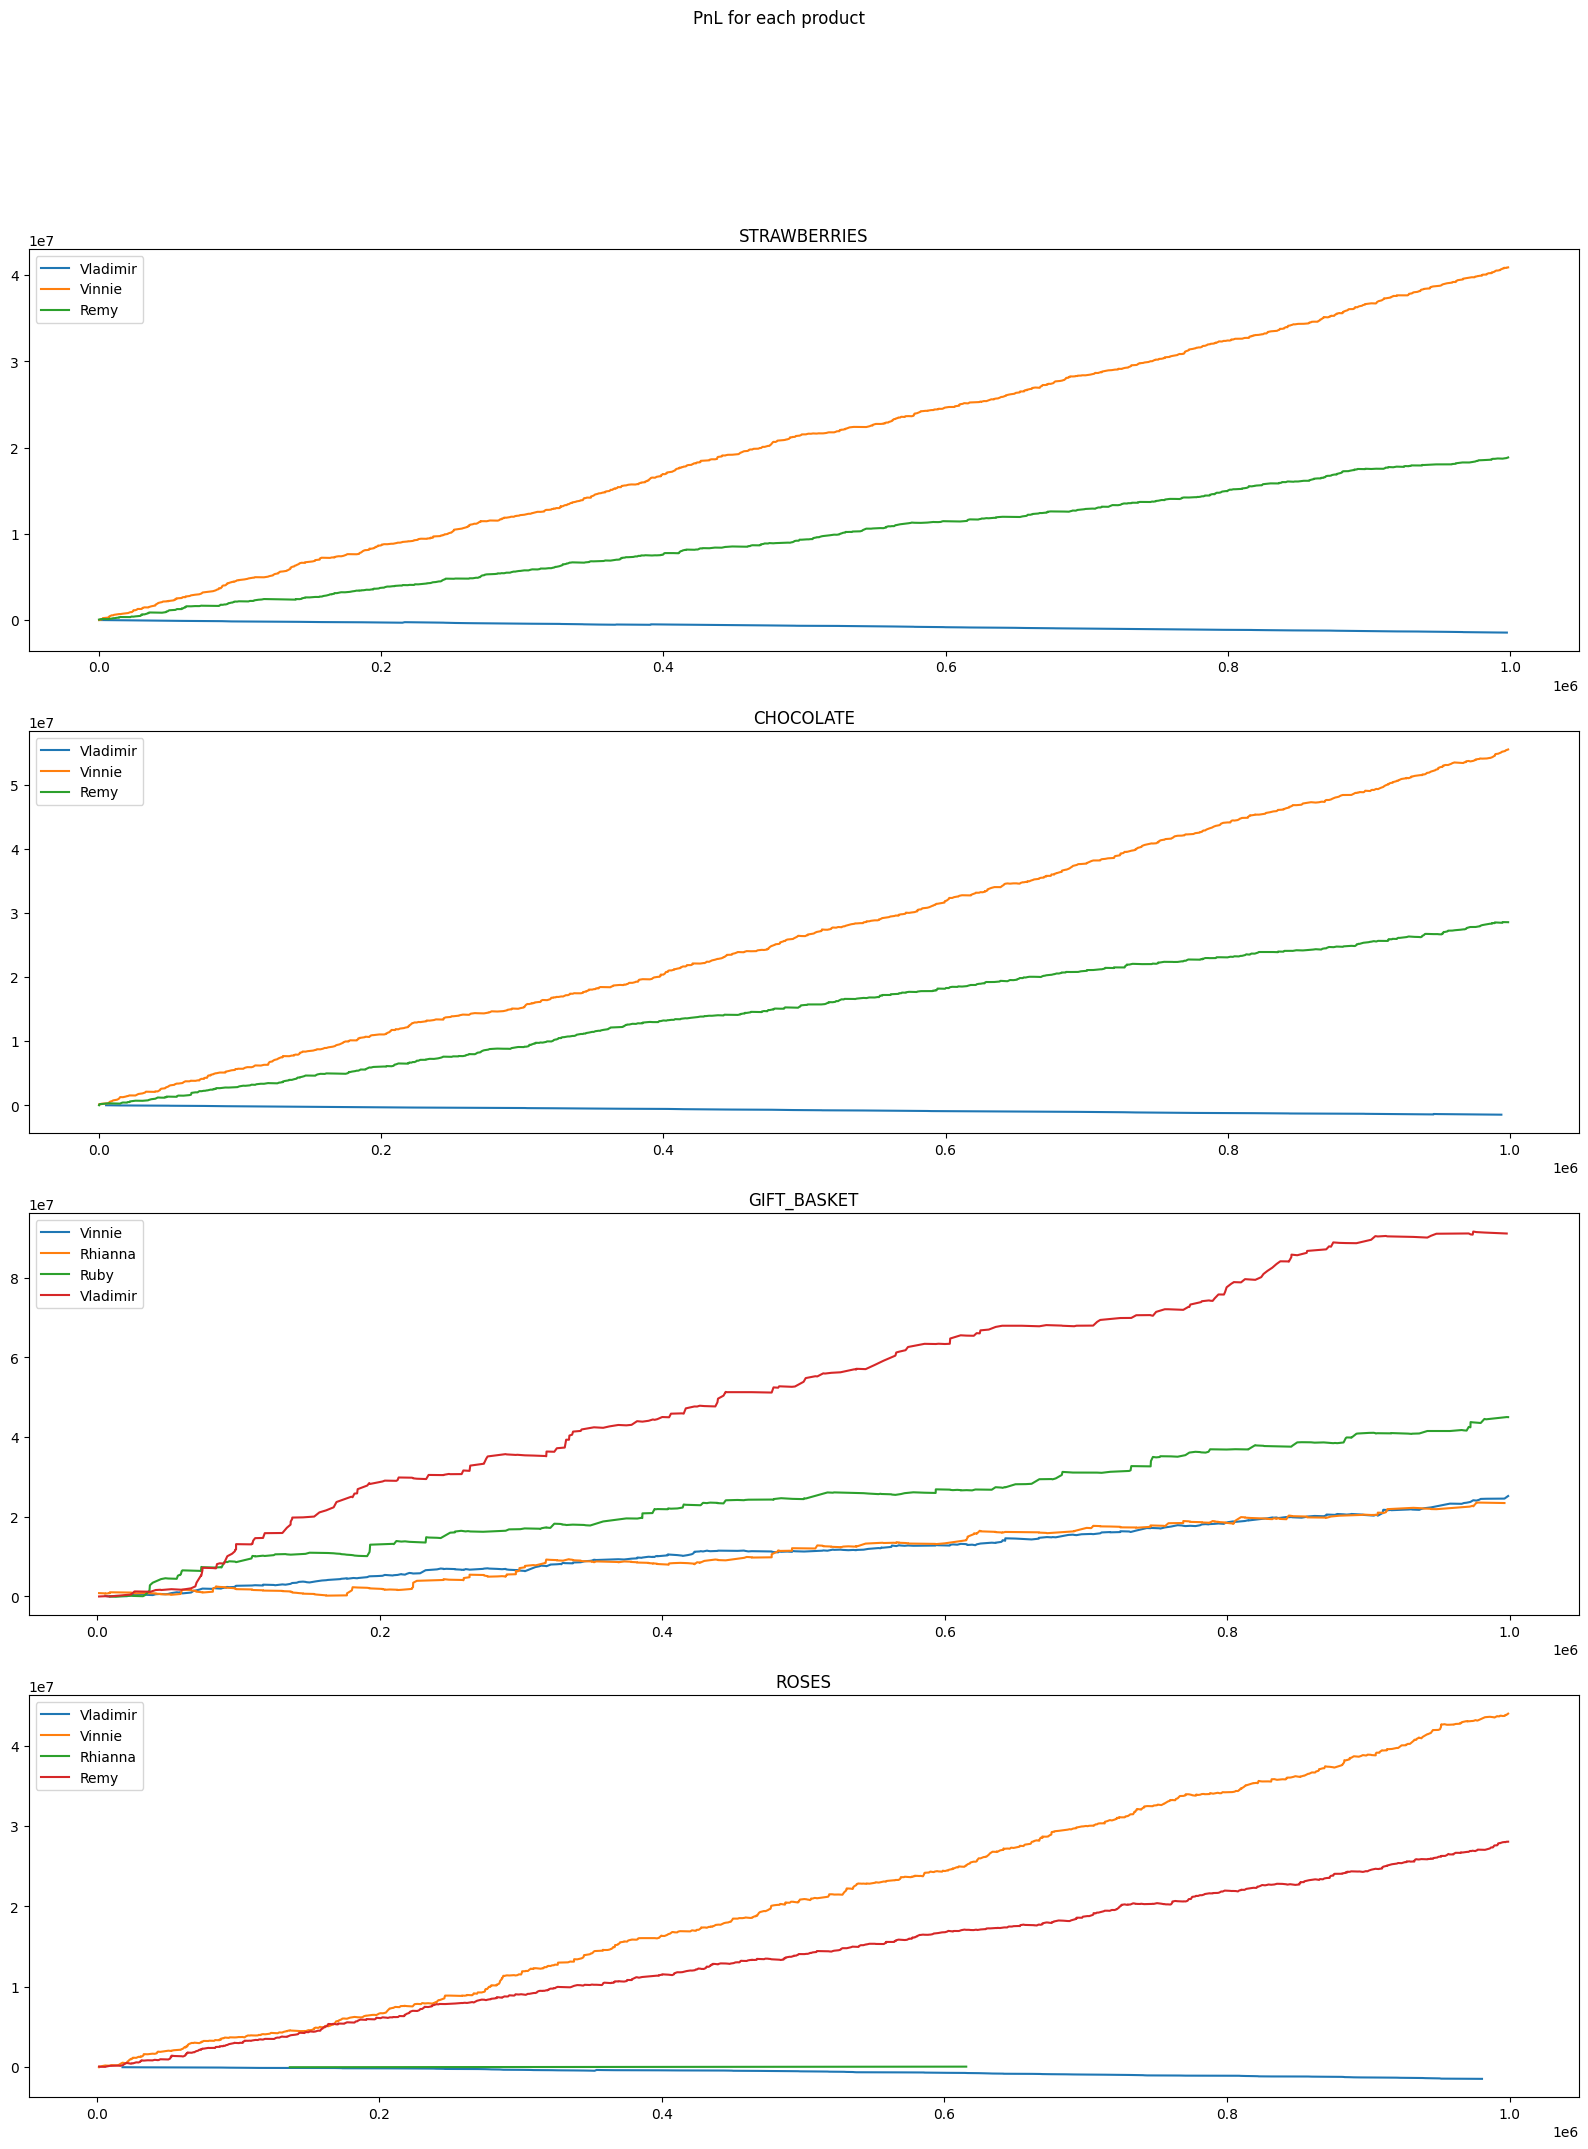

In [45]:
generate_pnl_for_each_product(trades,prices)

## Learn from the winners

In [18]:

def plot_trade_on_orderbook(price_df,trade_df,ticker,trader):
    fig,ax = plt.subplots(6,1,figsize=(20,20))

    # we have day = -2 to 3
    for i in range(6):
        ax[i].set_title(ticker+' day:'+str(i)+' trader:'+trader)
        ax[i].plot(price_df[(price_df['product']==ticker)&(price_df['day']==i-2)]['timestamp'],price_df[(price_df['product']==ticker)&(price_df['day']==i-2)]['mid_price'],'b',alpha = 0.2,label='mid_price')
        ax[i].plot(price_df[(price_df['product']==ticker)&(price_df['day']==i-2)]['timestamp'],price_df[(price_df['product']==ticker)&(price_df['day']==i-2)]['bid_price_1'],'g',alpha = 0.2,label='bid_price_1')
        ax[i].plot(price_df[(price_df['product']==ticker)&(price_df['day']==i-2)]['timestamp'],price_df[(price_df['product']==ticker)&(price_df['day']==i-2)]['ask_price_1'],'r',alpha = 0.2,label='ask_price_1')

        # plot the trades made by the trader
        time_interval = [1000*1000*(i-2),1000*1000*(i-1)-1]
        buyer_trades = trade_df[(trade_df['buyer']==trader)&(trade_df['timestamp']>=time_interval[0])&(trade_df['timestamp']<=time_interval[1])&(trade_df['symbol']==ticker)]
        seller_trades = trade_df[(trade_df['seller']==trader)&(trade_df['timestamp']>=time_interval[0])&(trade_df['timestamp']<=time_interval[1])&(trade_df['symbol']==ticker)]
        # we plot the trades over the orderbook
        ax[i].plot(buyer_trades['timestamp'],buyer_trades['price'],'gs',label='buy')
        ax[i].plot(seller_trades['timestamp'],seller_trades['price'],'rs',label='sell')
        ax[i].legend()

    plt.show()


def plot_traded_price_vs_mid(price_df, trade_df,ticker,trader):
    fig, ax = plt.subplots(2,1,figsize=(20,10))
    buy_trades = trade_df[(trade_df['buyer']==trader)&(trade_df['symbol']==ticker)]
    sell_trades = trade_df[(trade_df['seller']==trader)&(trade_df['symbol']==ticker)]

    bt = buy_trades.merge(price_df[['product','timestamp','mid_price']],left_on=['symbol','timestamp'], right_on = ['product','timestamp'],how='left')
    st = sell_trades.merge(price_df[['product','timestamp','mid_price']],left_on=['symbol','timestamp'], right_on = ['product','timestamp'],how='left')


    ax[0].plot(bt['quantity'],bt['price']-bt['mid_price'],'go',label='buy')
    ax[0].axhline(y=0, color='r', linestyle='-')
    ax[1].plot(st['quantity'],st['price']-st['mid_price'],'ro',label='sell')
    ax[1].axhline(y=0, color='r', linestyle='-')
    ax[0].legend()  
    ax[1].legend()
    plt.show()


def plot_traded_price_vs_best(price_df, trade_df,ticker,trader):
    fig, ax = plt.subplots(2,1,figsize=(20,10))
    buy_trades = trade_df[(trade_df['buyer']==trader)&(trade_df['symbol']==ticker)]
    sell_trades = trade_df[(trade_df['seller']==trader)&(trade_df['symbol']==ticker)]

    bt = buy_trades.merge(price_df[['product','timestamp','bid_price_1']],left_on=['symbol','timestamp'], right_on = ['product','timestamp'],how='left')
    st = sell_trades.merge(price_df[['product','timestamp','ask_price_1']],left_on=['symbol','timestamp'], right_on = ['product','timestamp'],how='left')


    ax[0].plot(bt['quantity'],bt['price']-bt['bid_price_1'],'go',label='buy')
    ax[0].axhline(y=0, color='r', linestyle='-')
    ax[1].plot(st['quantity'],st['price']-st['ask_price_1'],'ro',label='sell')
    ax[1].axhline(y=0, color='r', linestyle='-')
    ax[0].set_title('trader:'+trader+' ticker:'+ticker + 'traded buy price vs best bid on the market')
    ax[1].set_title('trader:'+trader+' ticker:'+ticker + 'traded sell price vs best ask on the market')
    ax[0].legend()  
    ax[1].legend()
    plt.show()

In [19]:
prices.head(5)

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,2,0,COCONUT,10135.0,150.0,10134.0,64.0,NaN,NaN,10136,150,10137.0,64.0,NaN,NaN,10135.5,0.0
1,2,0,COCONUT_COUPON,682.0,38.0,NaN,NaN,NaN,NaN,683,38,NaN,NaN,NaN,NaN,682.5,0.0
2,2,100,COCONUT_COUPON,681.0,19.0,680.0,20.0,NaN,NaN,682,39,NaN,NaN,NaN,NaN,681.5,0.0
3,2,100,COCONUT,10134.0,150.0,NaN,NaN,NaN,NaN,10136,106,10137.0,44.0,NaN,NaN,10135.0,0.0
4,2,200,COCONUT,10135.0,136.0,10134.0,55.0,NaN,NaN,10136,136,10137.0,55.0,NaN,NaN,10135.5,0.0


### Olivia is tradeing rarely, but capture the best price

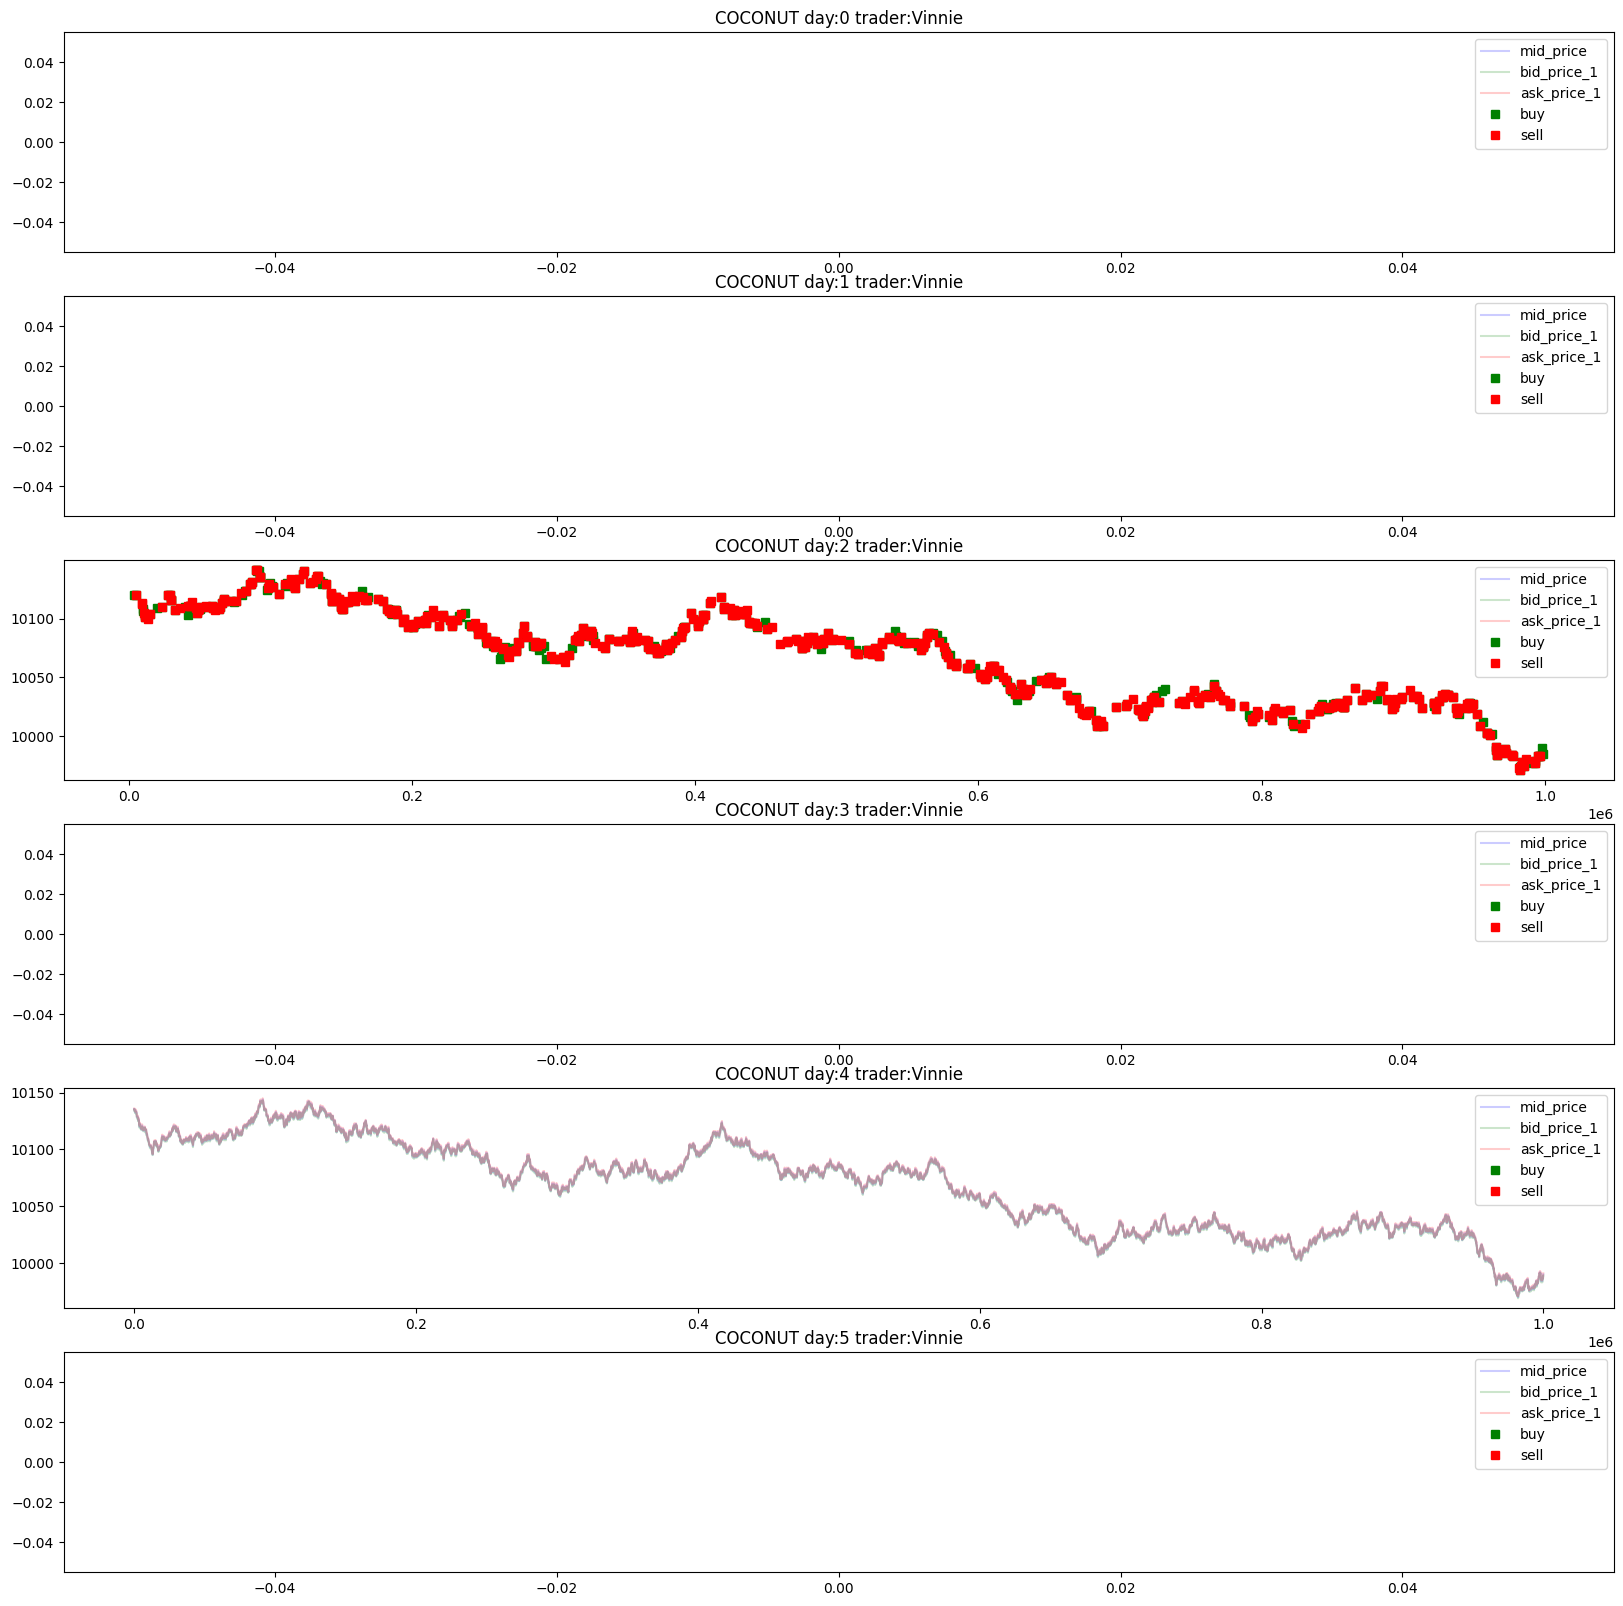

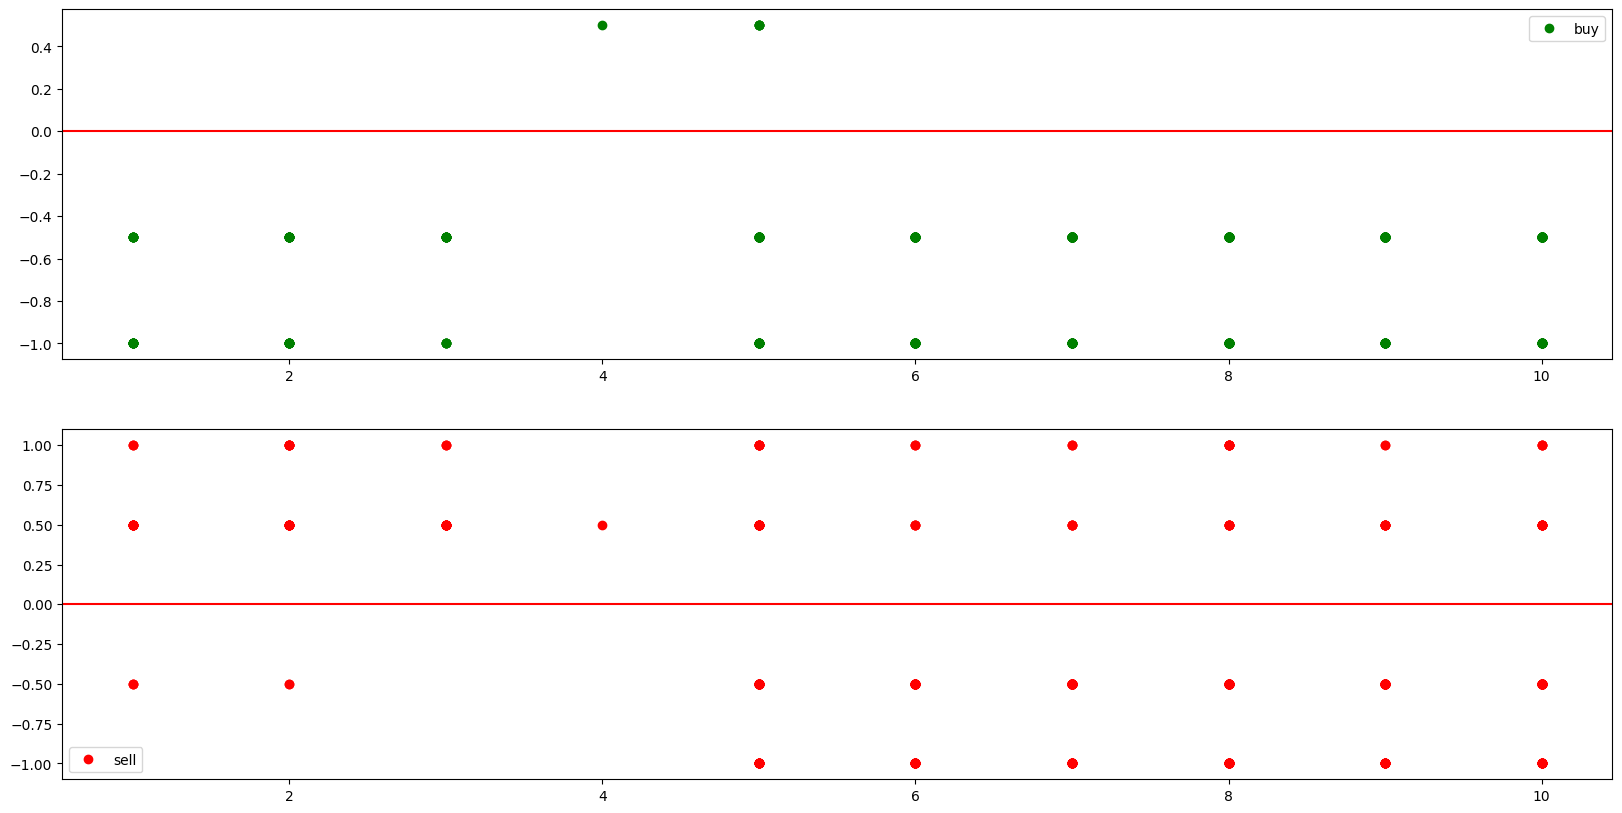

In [31]:
plot_trade_on_orderbook(prices,trades,'COCONUT','Vinnie')
plot_traded_price_vs_mid(prices,trades,'COCONUT','Vinnie')

# plot_trade_on_orderbook(prices,trades,'BANANAS','Olivia')
# plot_traded_price_vs_mid(prices,trades,'BANANAS','Olivia')

# plot_trade_on_orderbook(prices,trades,'UKULELE','Olivia')
# plot_traded_price_vs_mid(prices,trades,'UKULELE','Olivia')

## Caesar is the best performer in the C&PC pair trading, but turns out ot be a degen

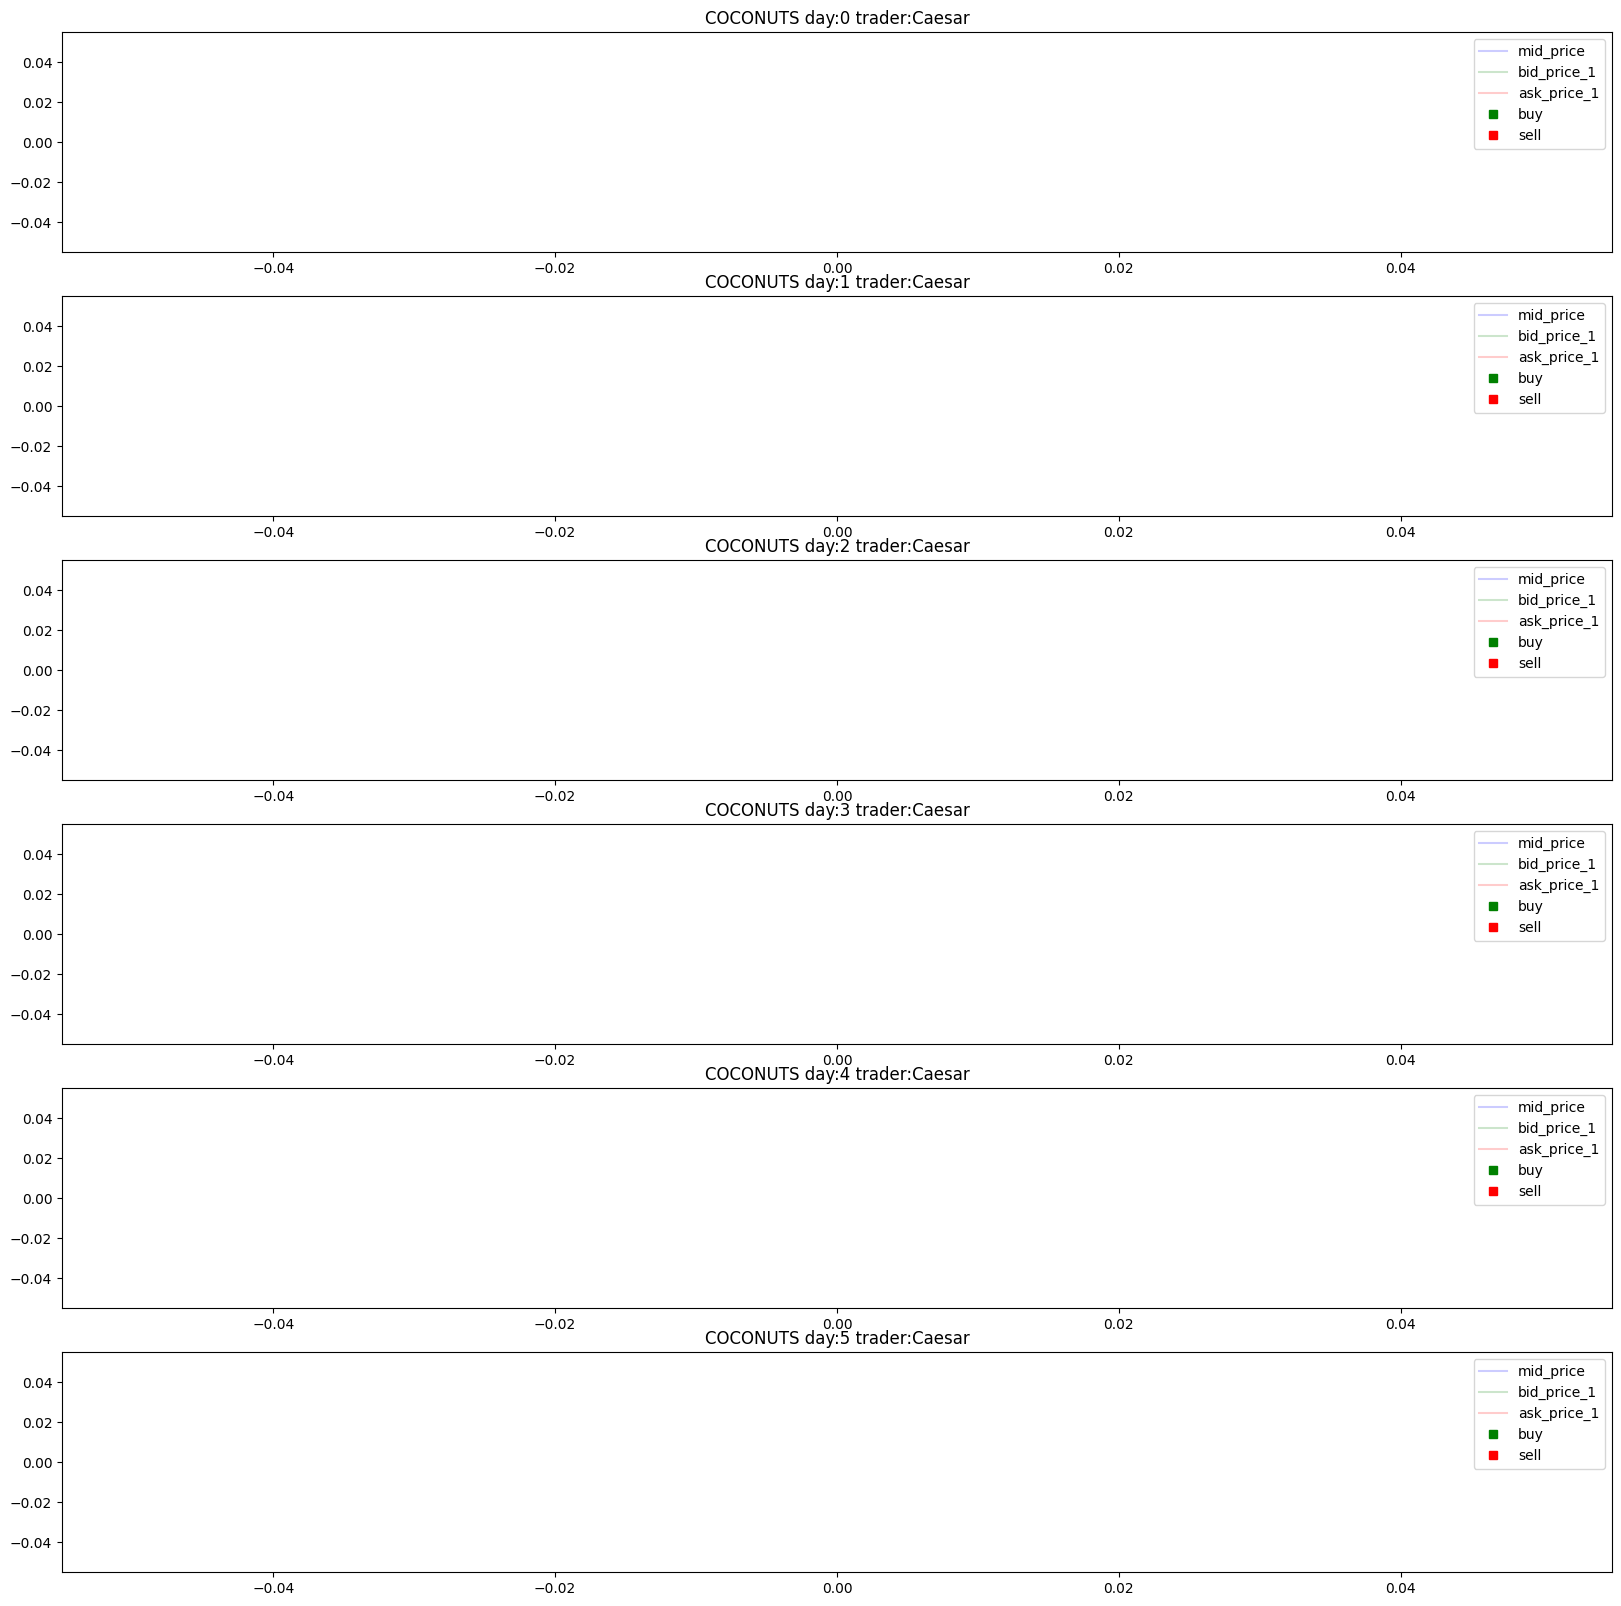

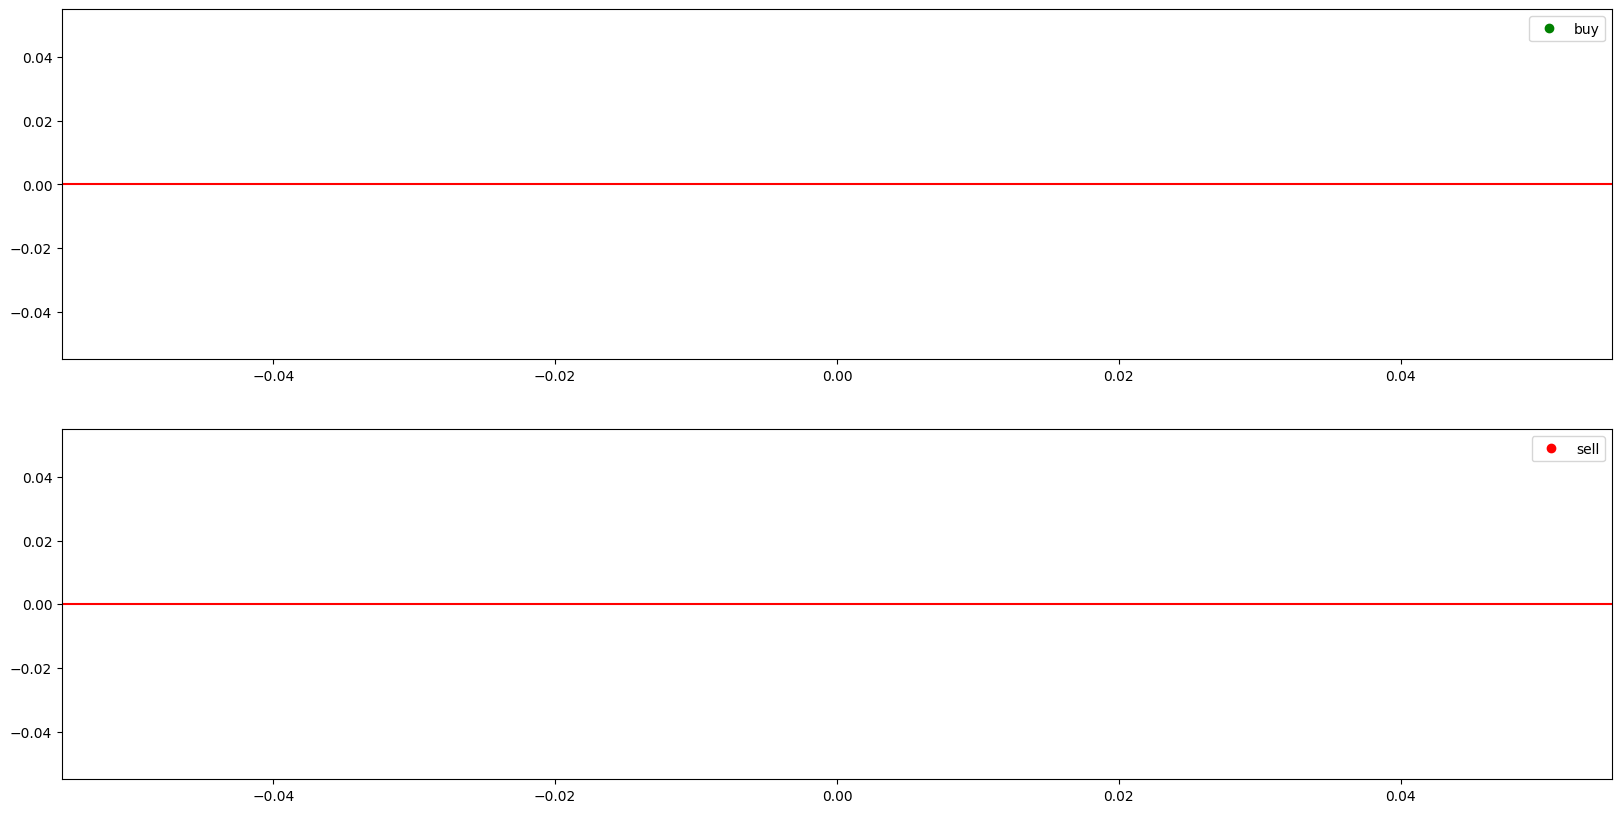

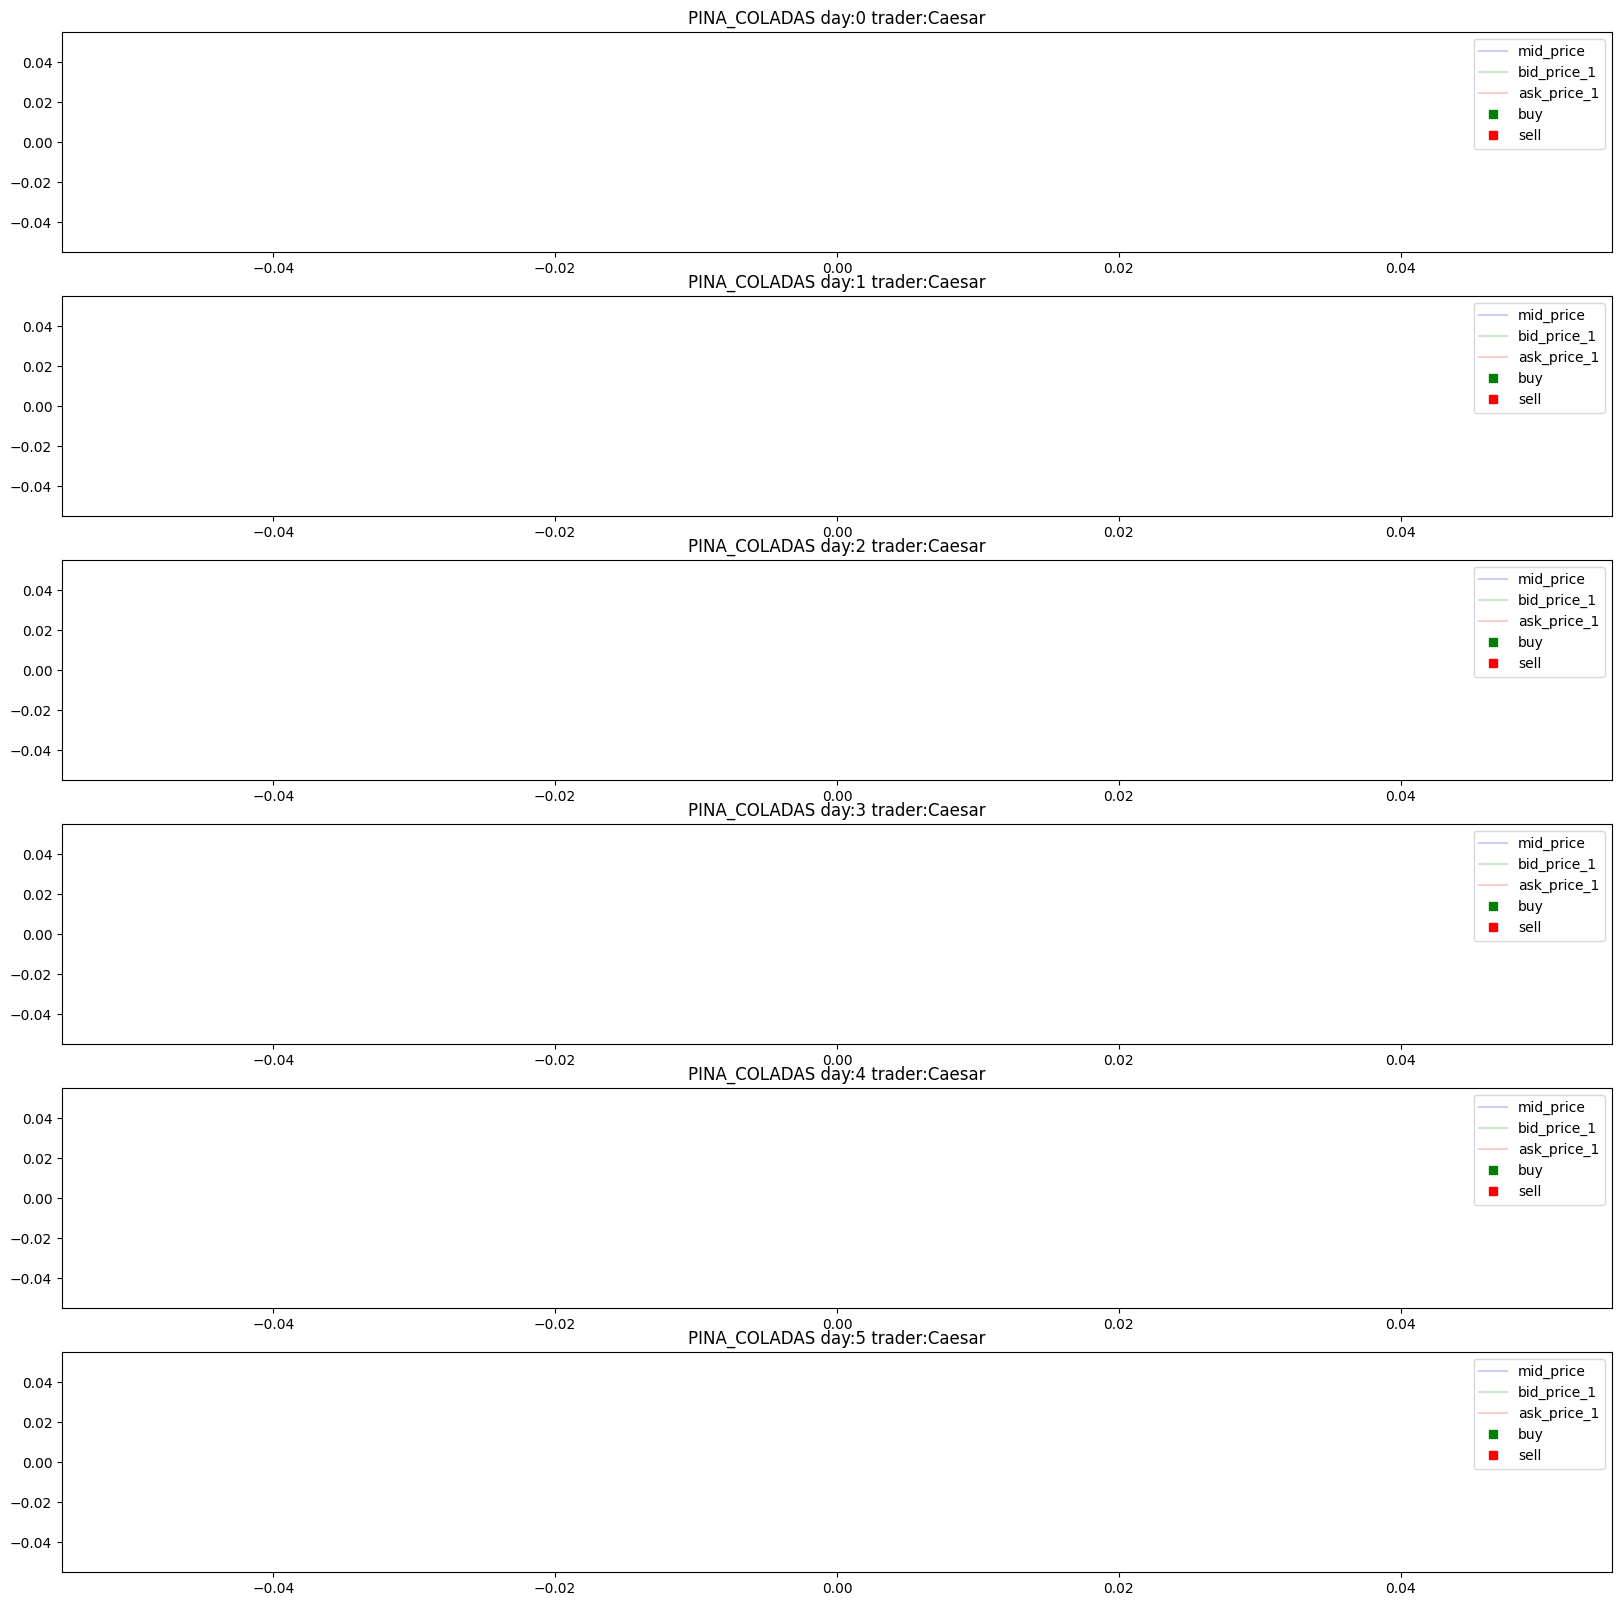

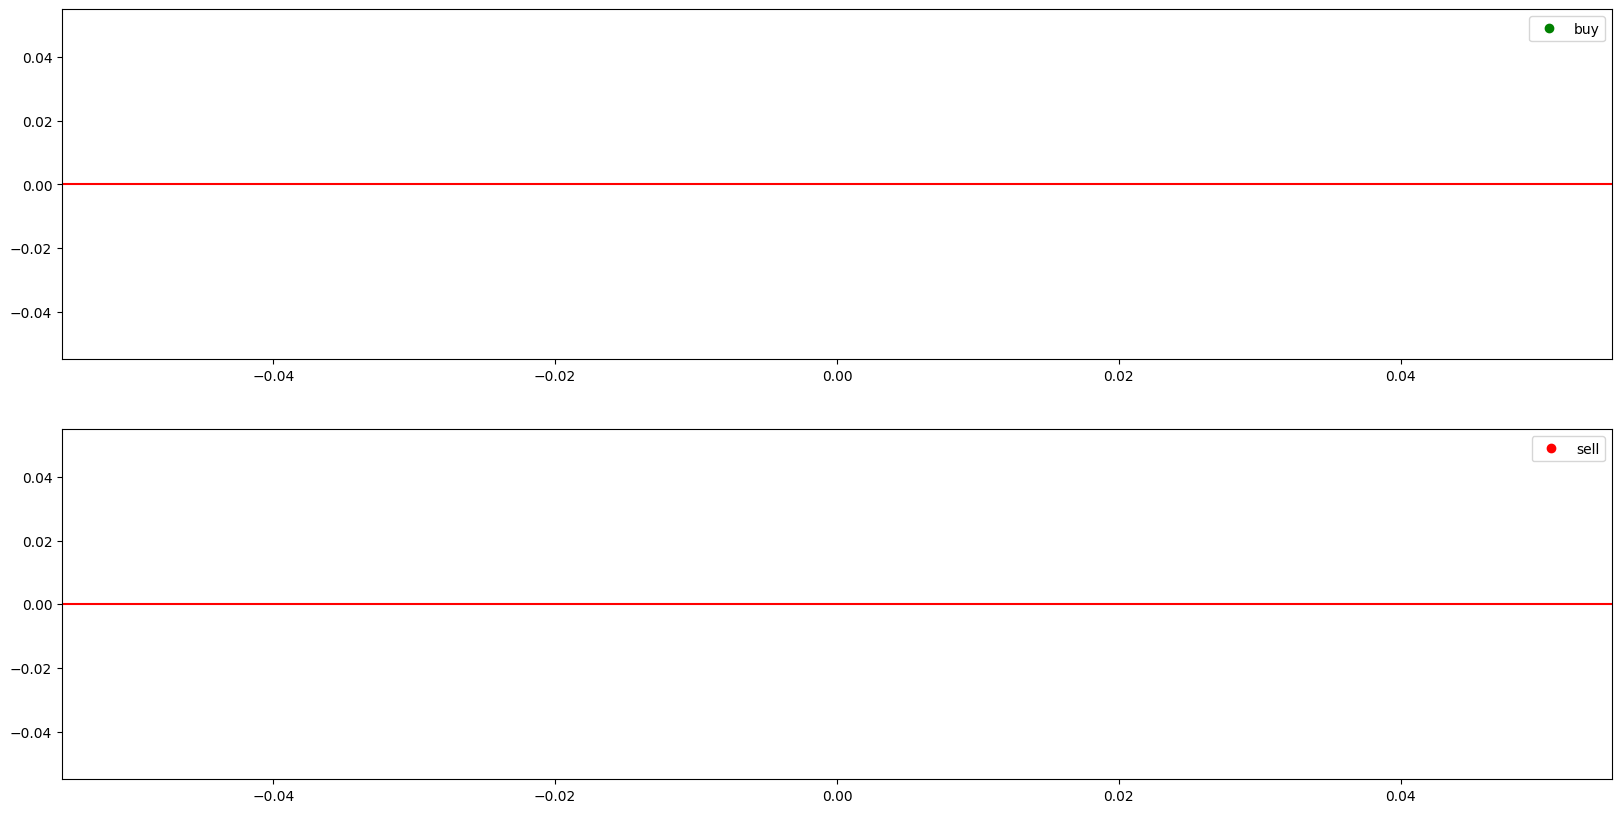

In [21]:
plot_trade_on_orderbook(prices,trades,'COCONUTS','Caesar')
plot_traded_price_vs_mid(prices,trades,'COCONUTS','Caesar')
plot_trade_on_orderbook(prices,trades,'PINA_COLADAS','Caesar')
plot_traded_price_vs_mid(prices,trades,'PINA_COLADAS','Caesar')


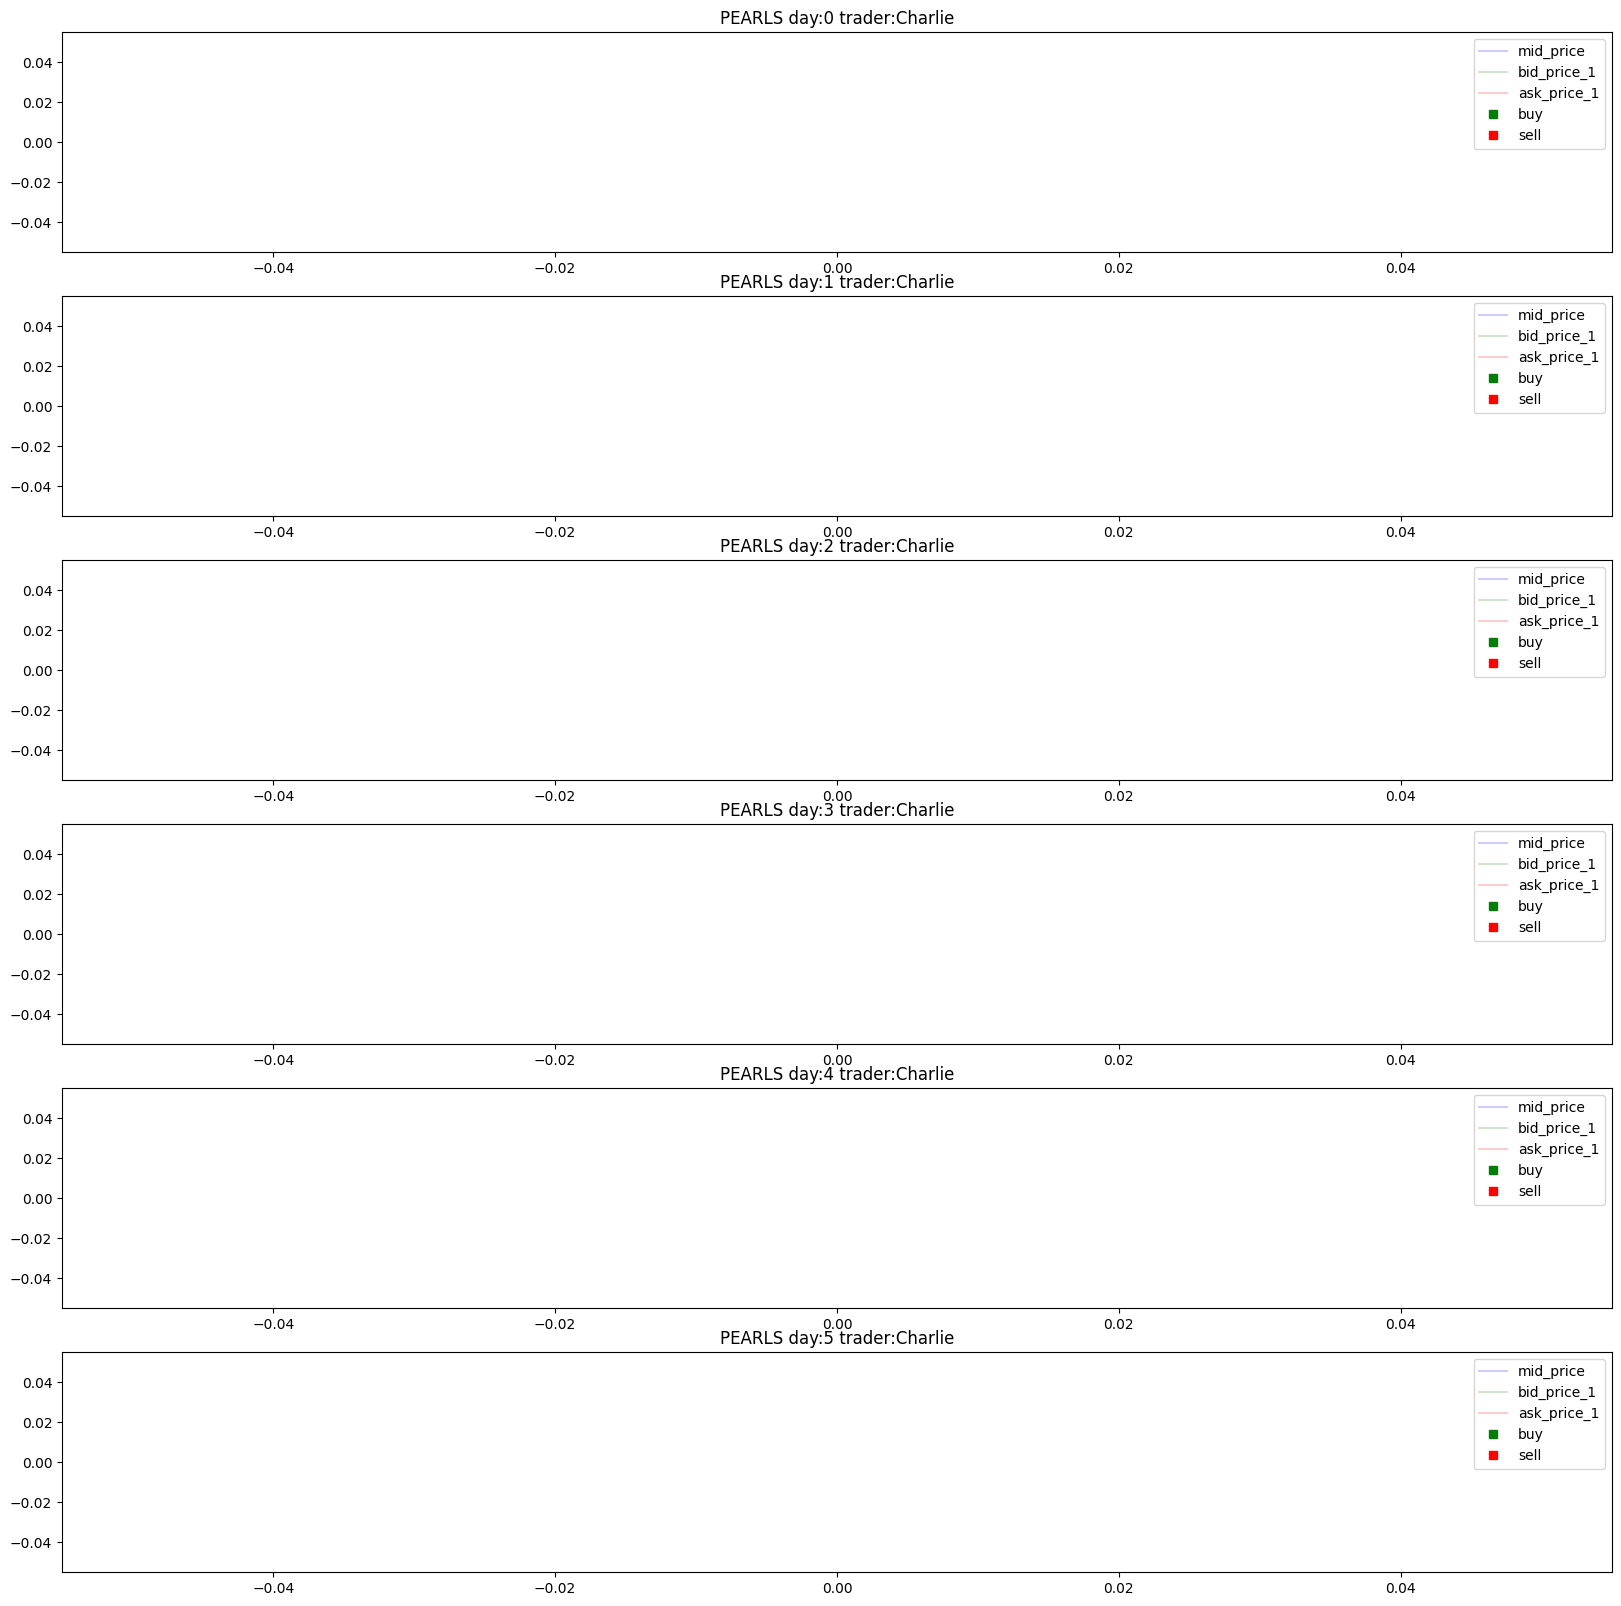

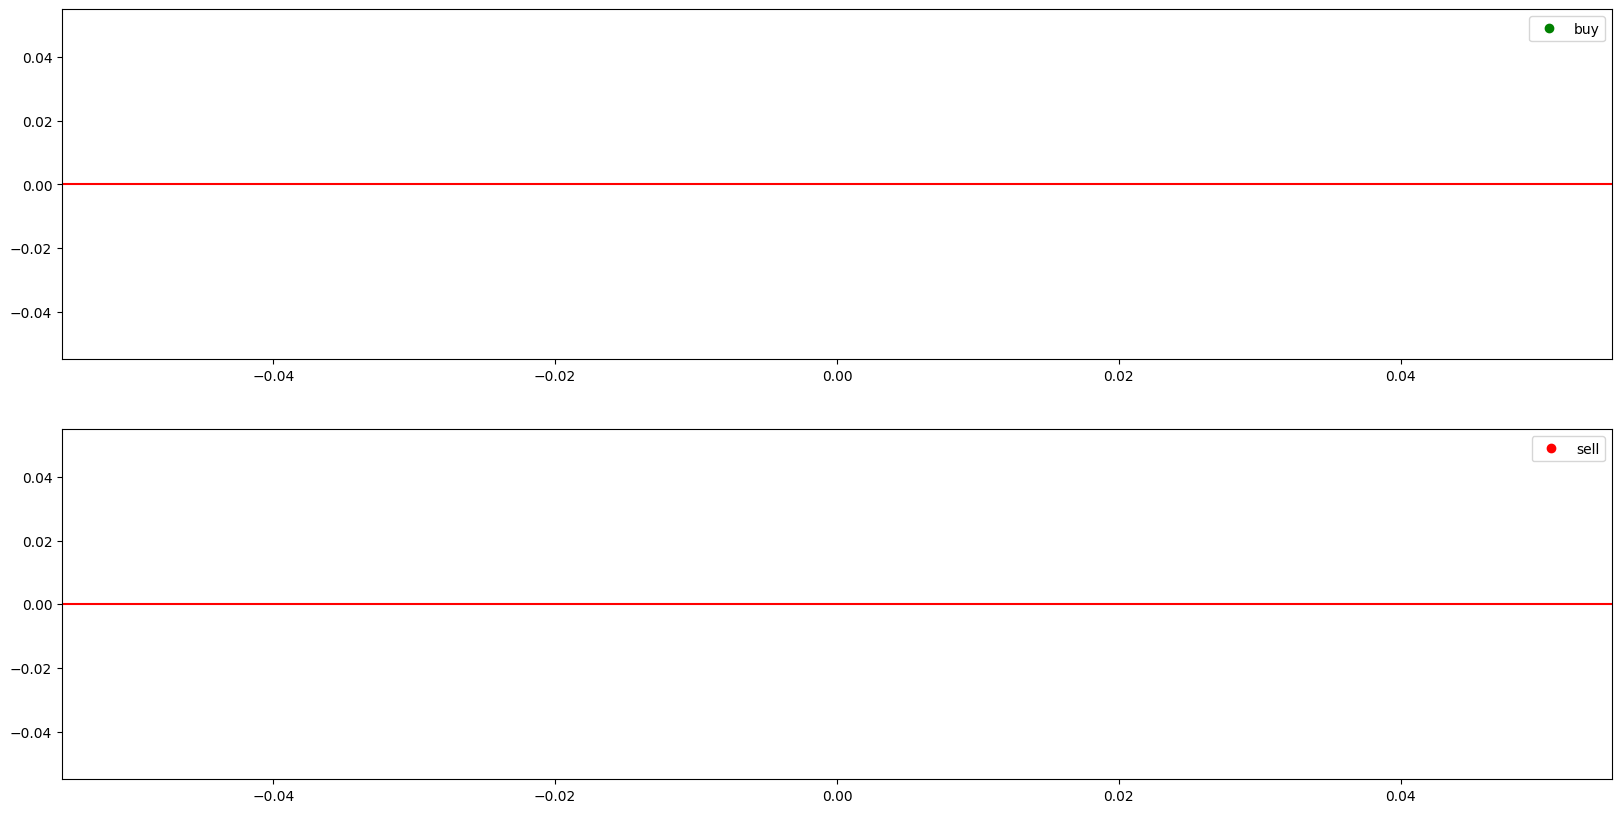

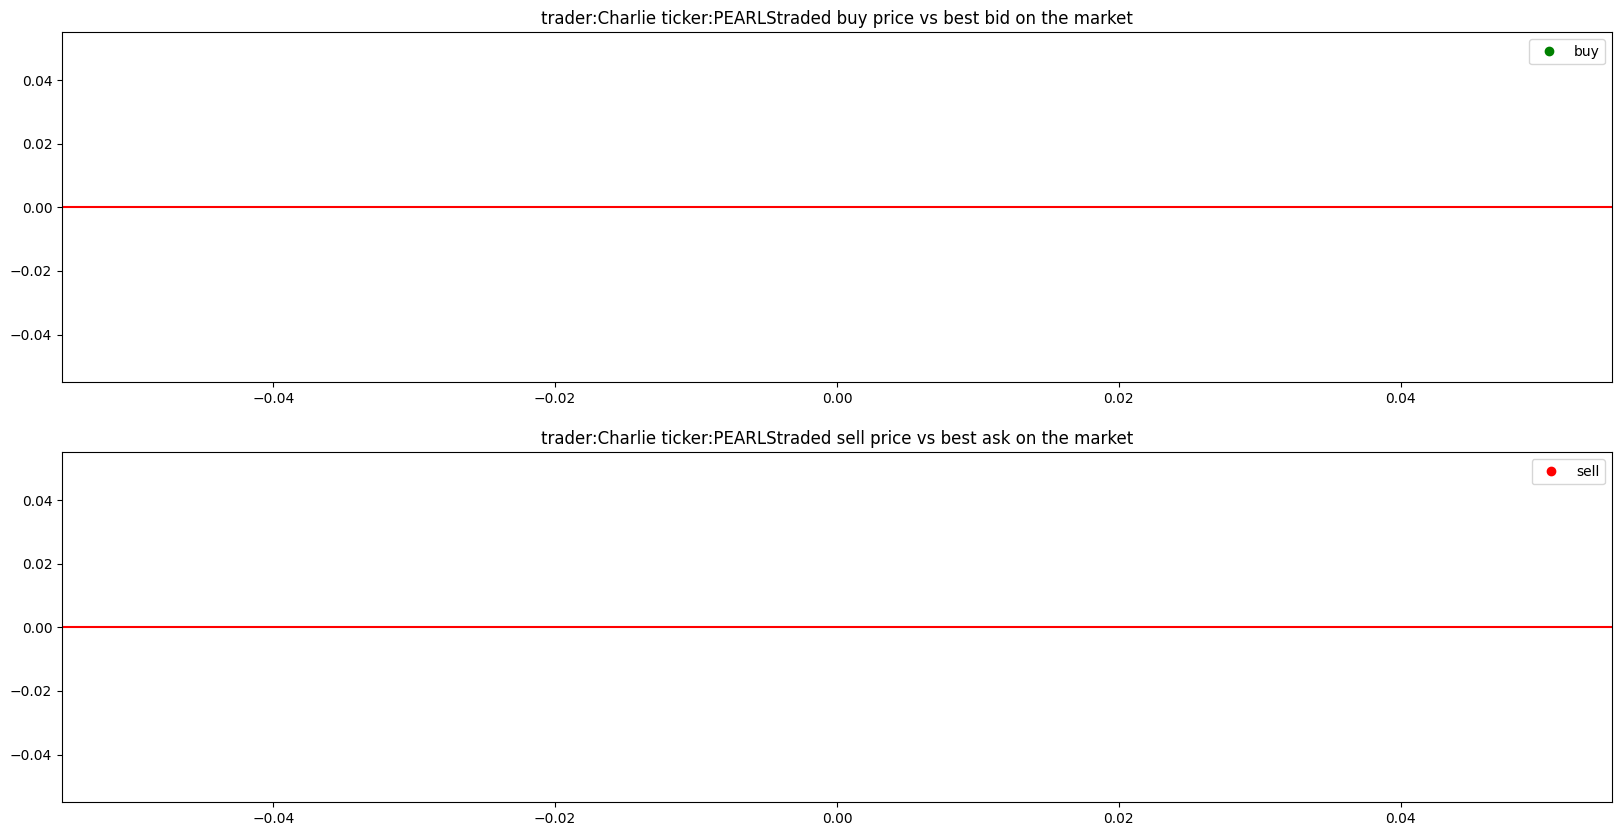

In [22]:
plot_trade_on_orderbook(prices,trades,'PEARLS','Charlie')
plot_traded_price_vs_mid(prices,trades,'PEARLS','Charlie')
plot_traded_price_vs_best(prices,trades,'PEARLS','Charlie')

### Camilla is the best performer in the diving gear, turns out she just selling it 

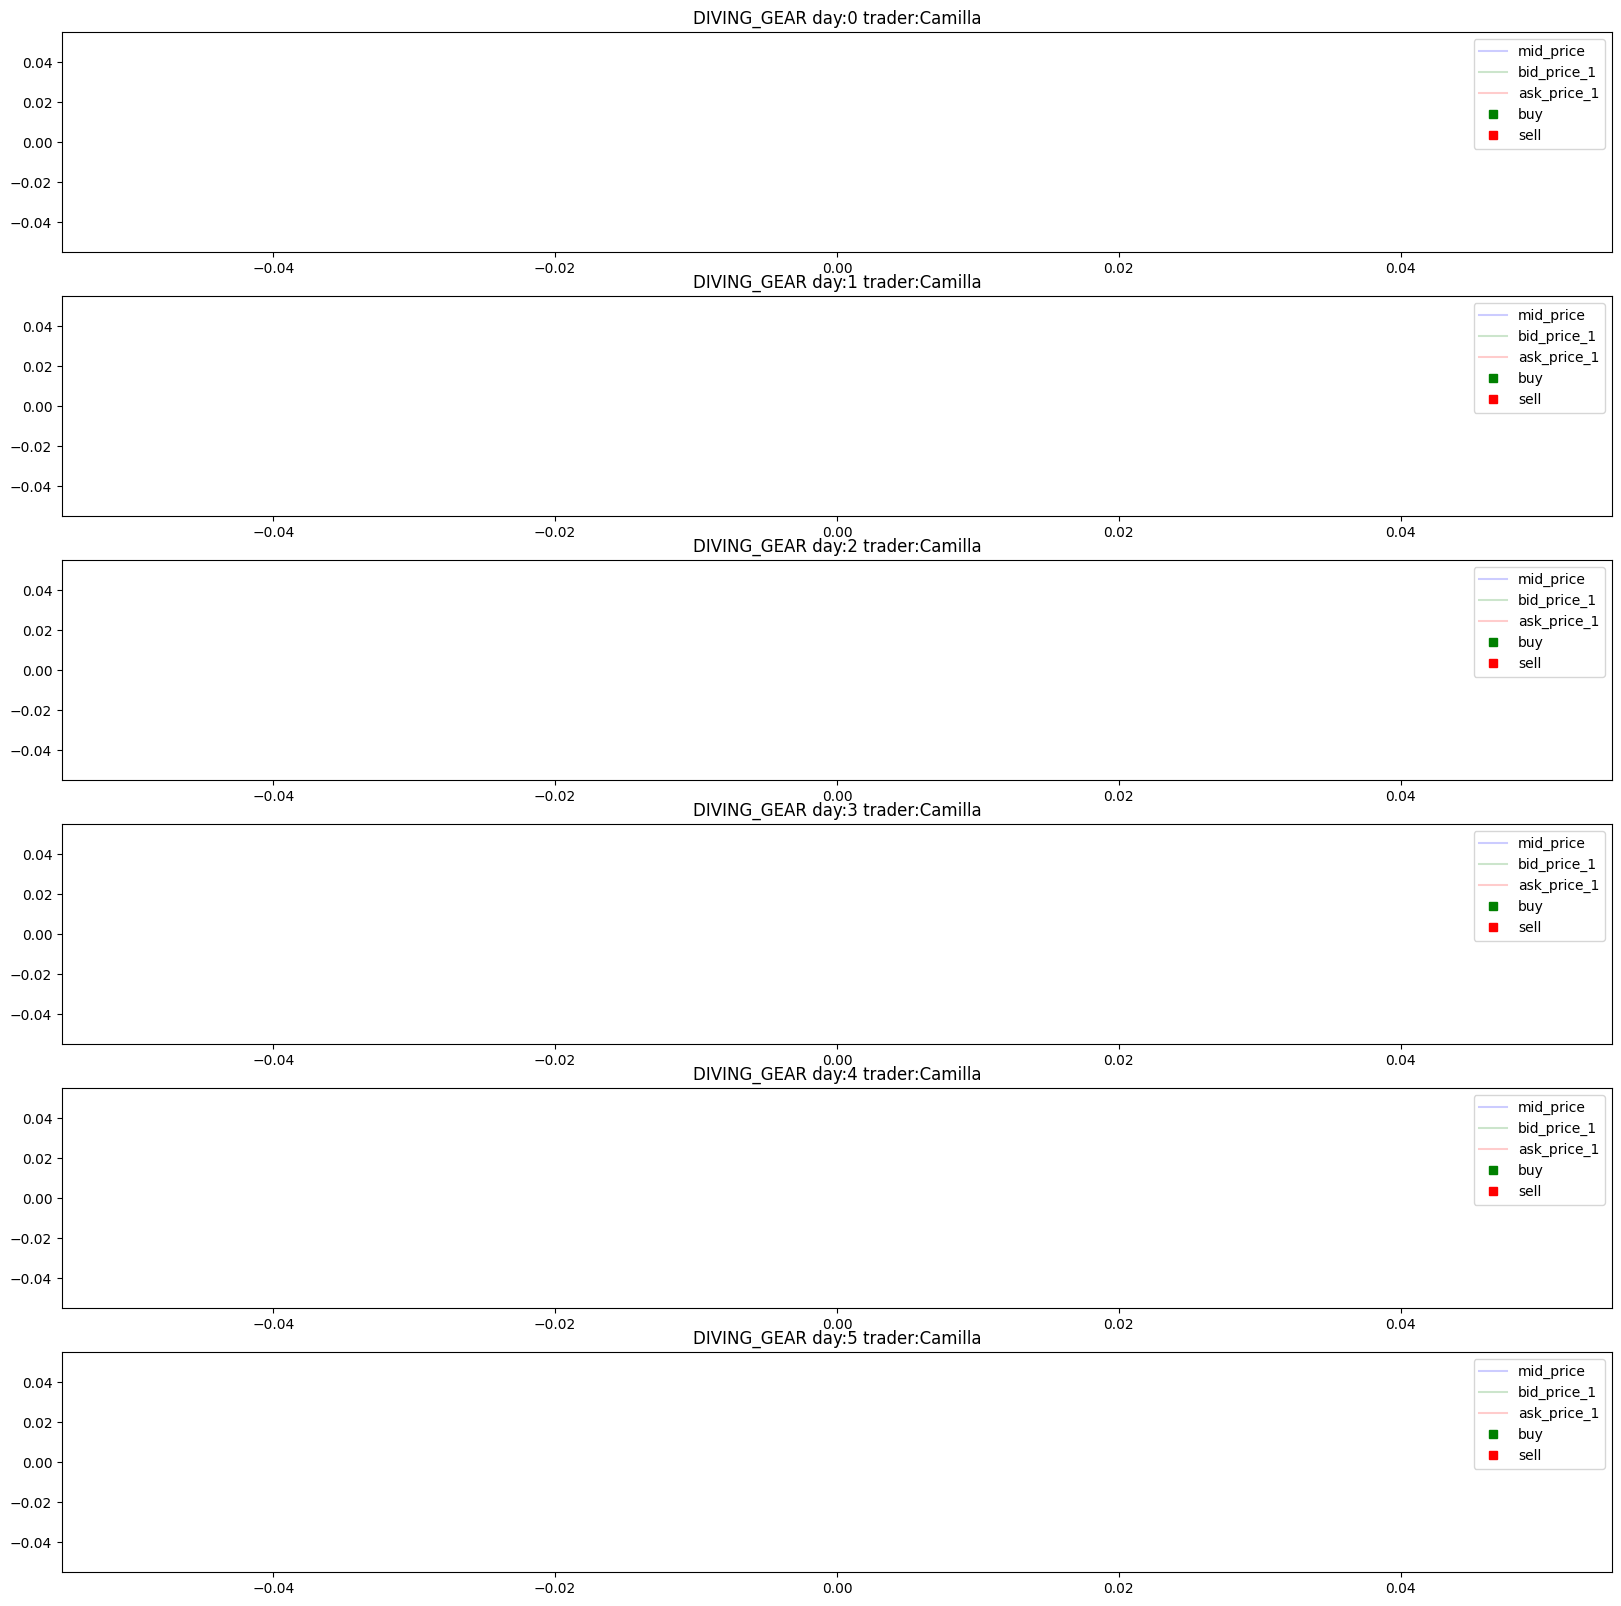

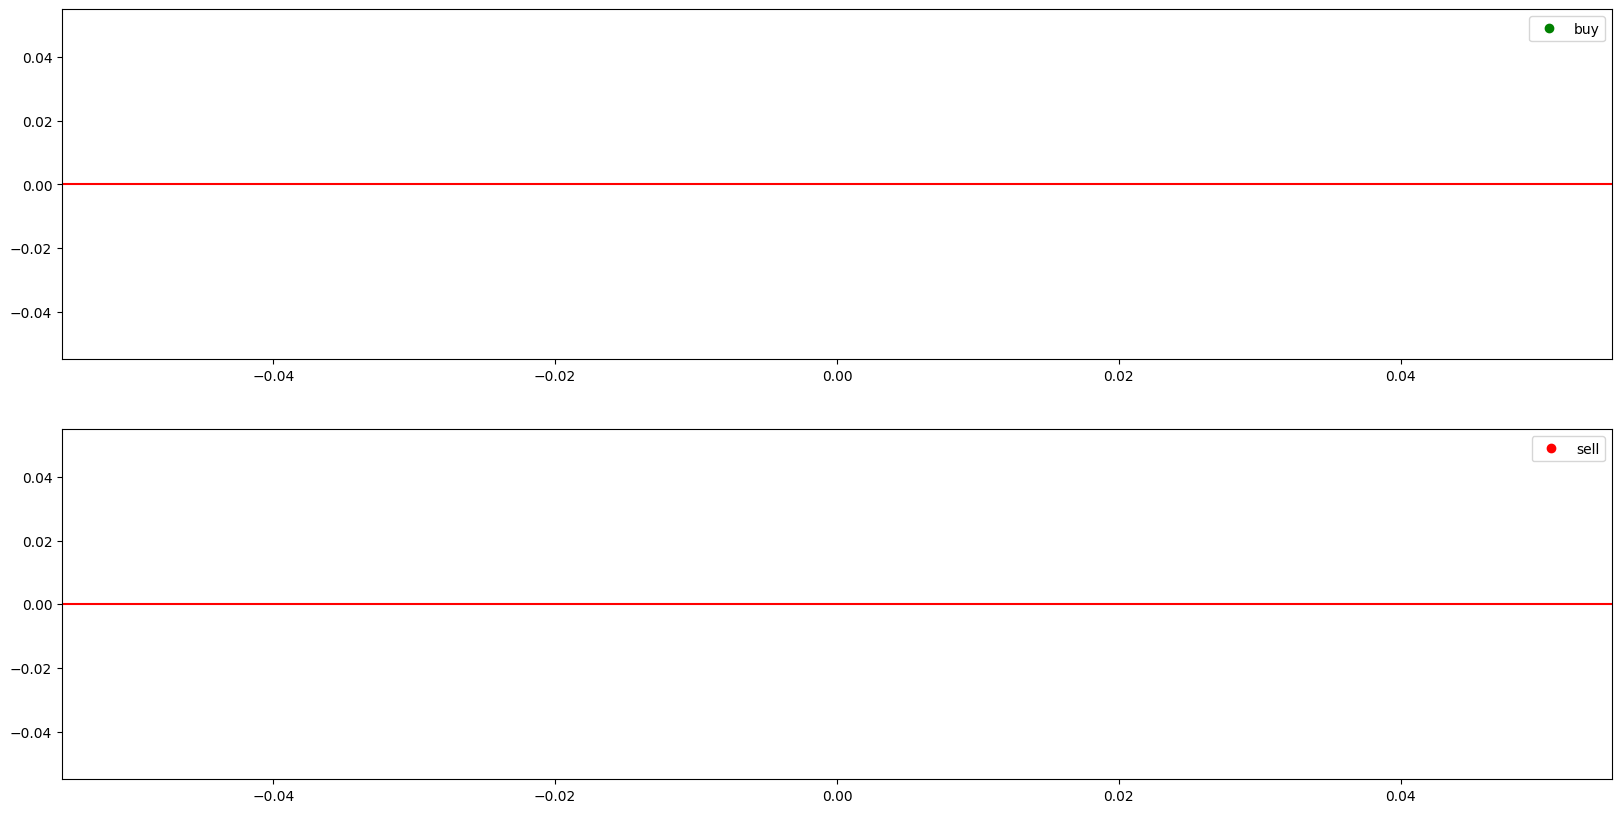

In [23]:
plot_trade_on_orderbook(prices,trades,'DIVING_GEAR','Camilla')
plot_traded_price_vs_mid(prices,trades,'DIVING_GEAR','Camilla')

In [24]:
### Camilla also perform well on BERRIES

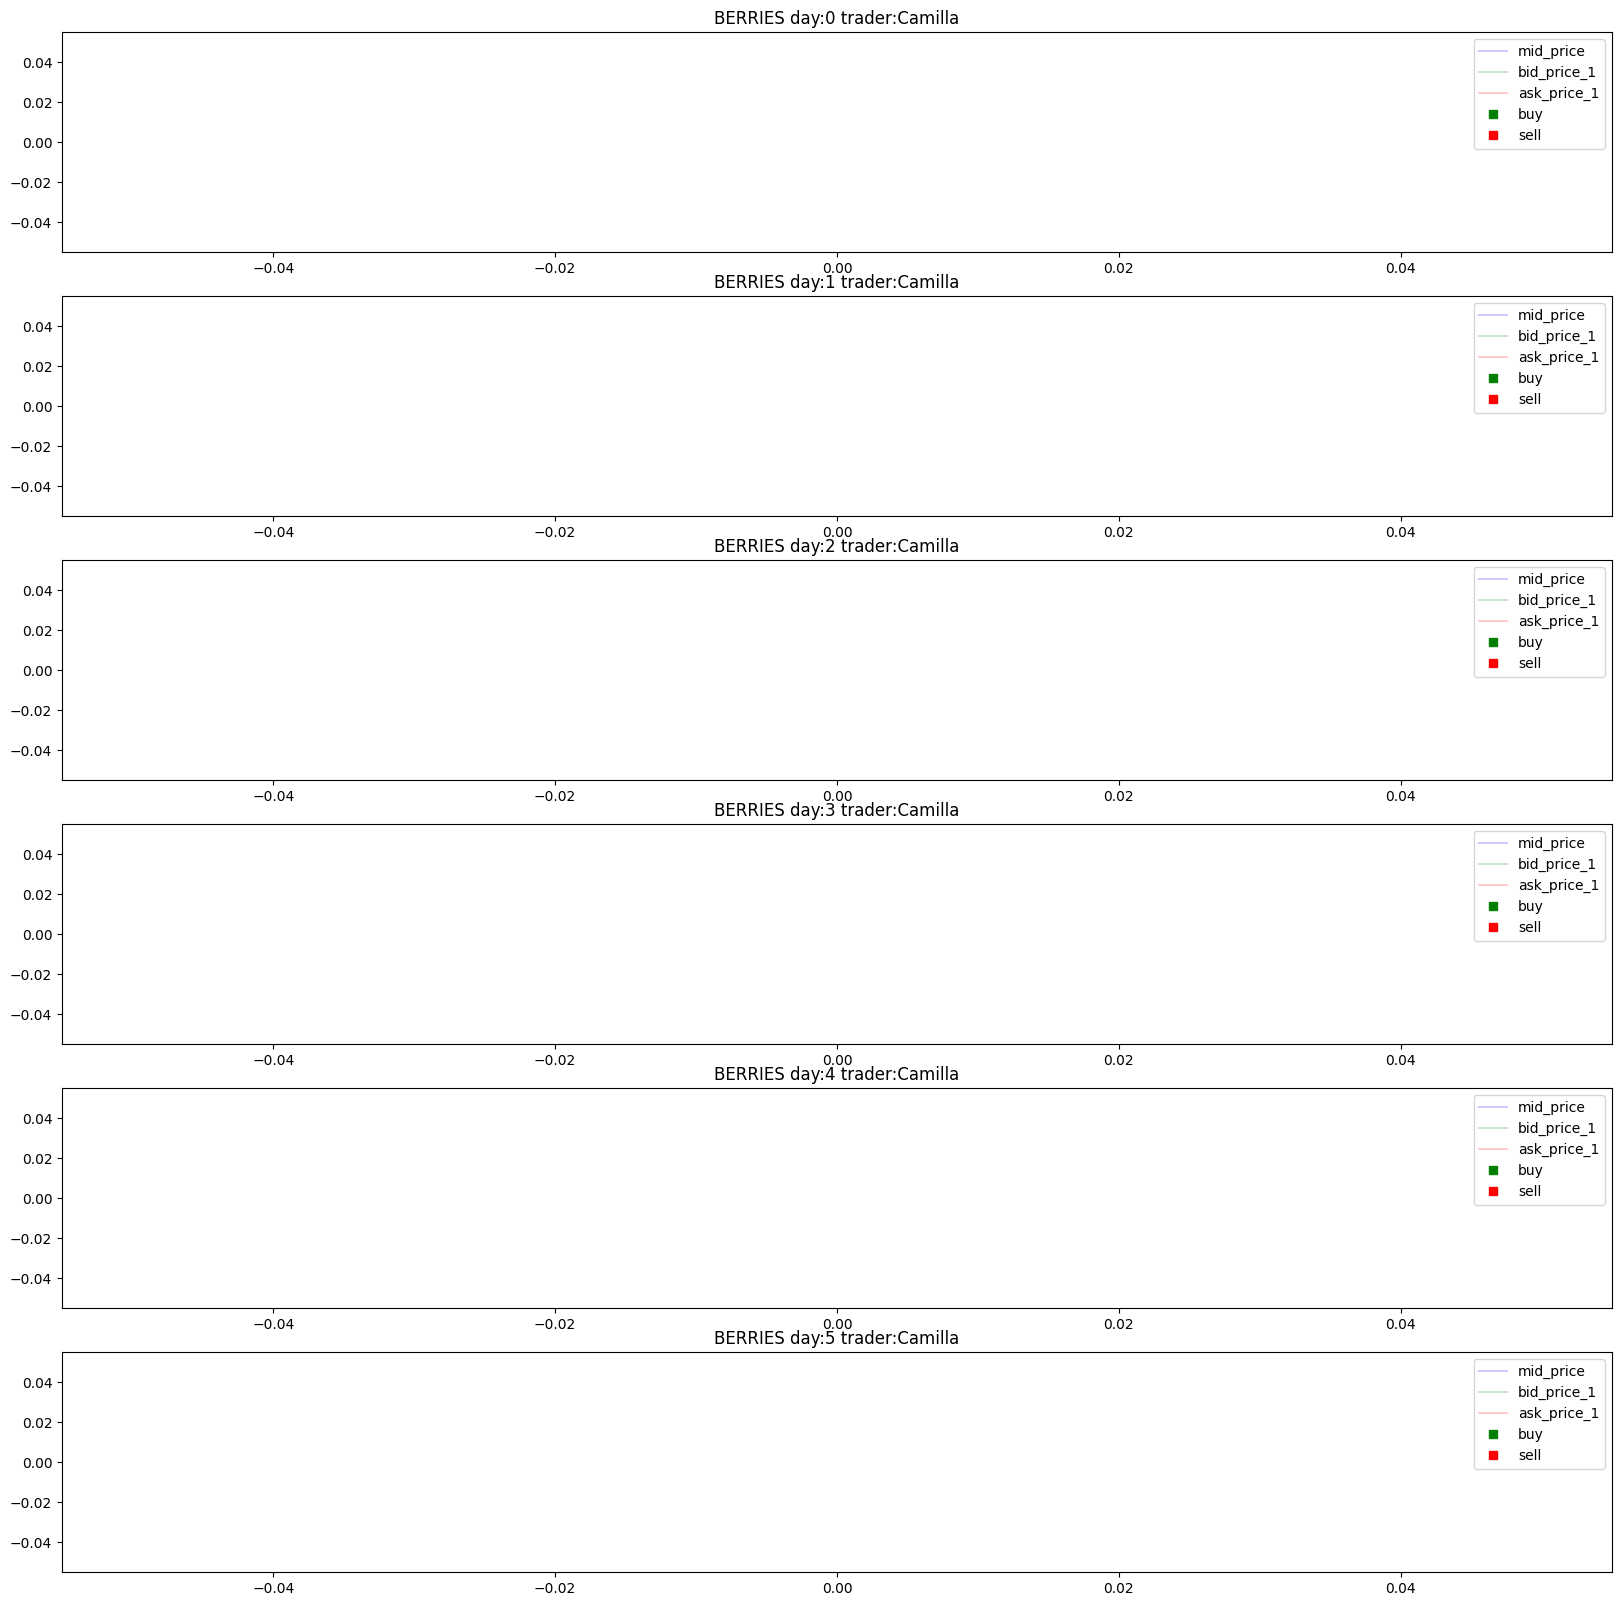

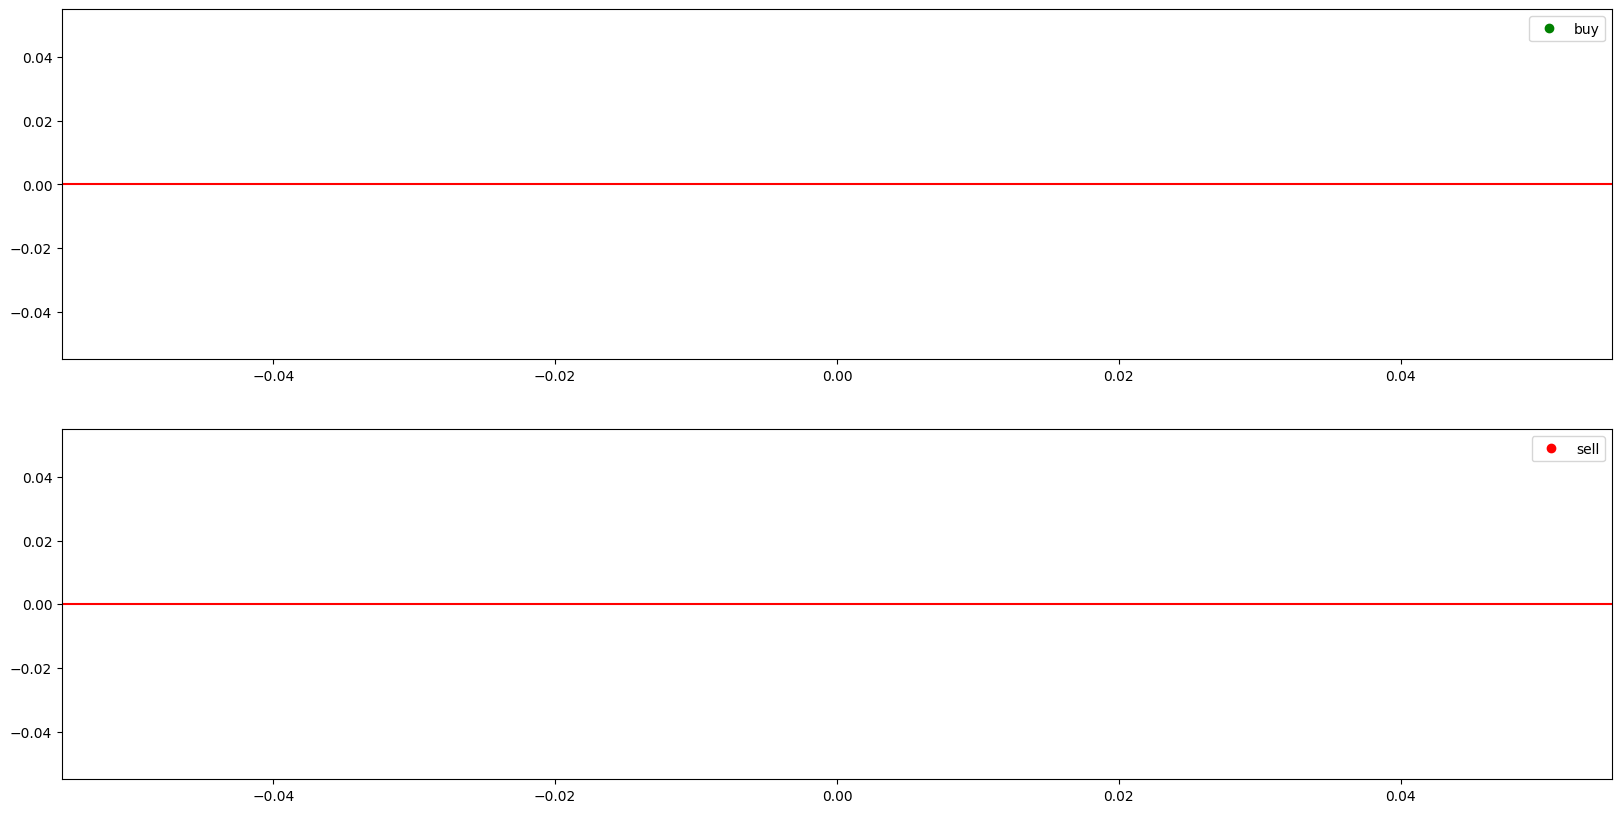

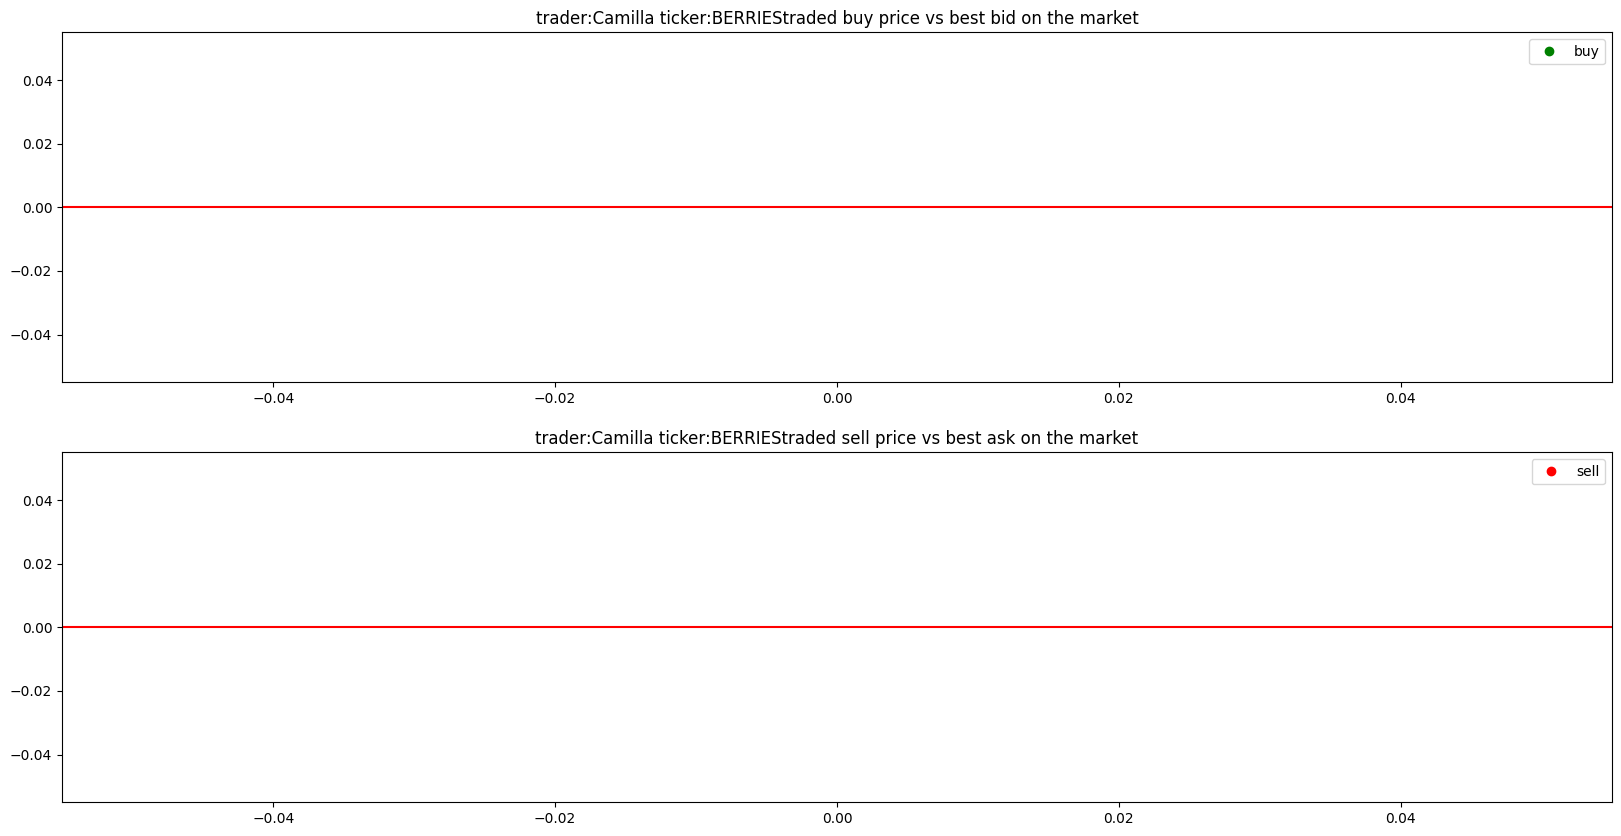

In [25]:

plot_trade_on_orderbook(prices,trades,'BERRIES','Camilla')
plot_traded_price_vs_mid(prices,trades,'BERRIES','Camilla')
plot_traded_price_vs_best(prices,trades,'BERRIES','Camilla')

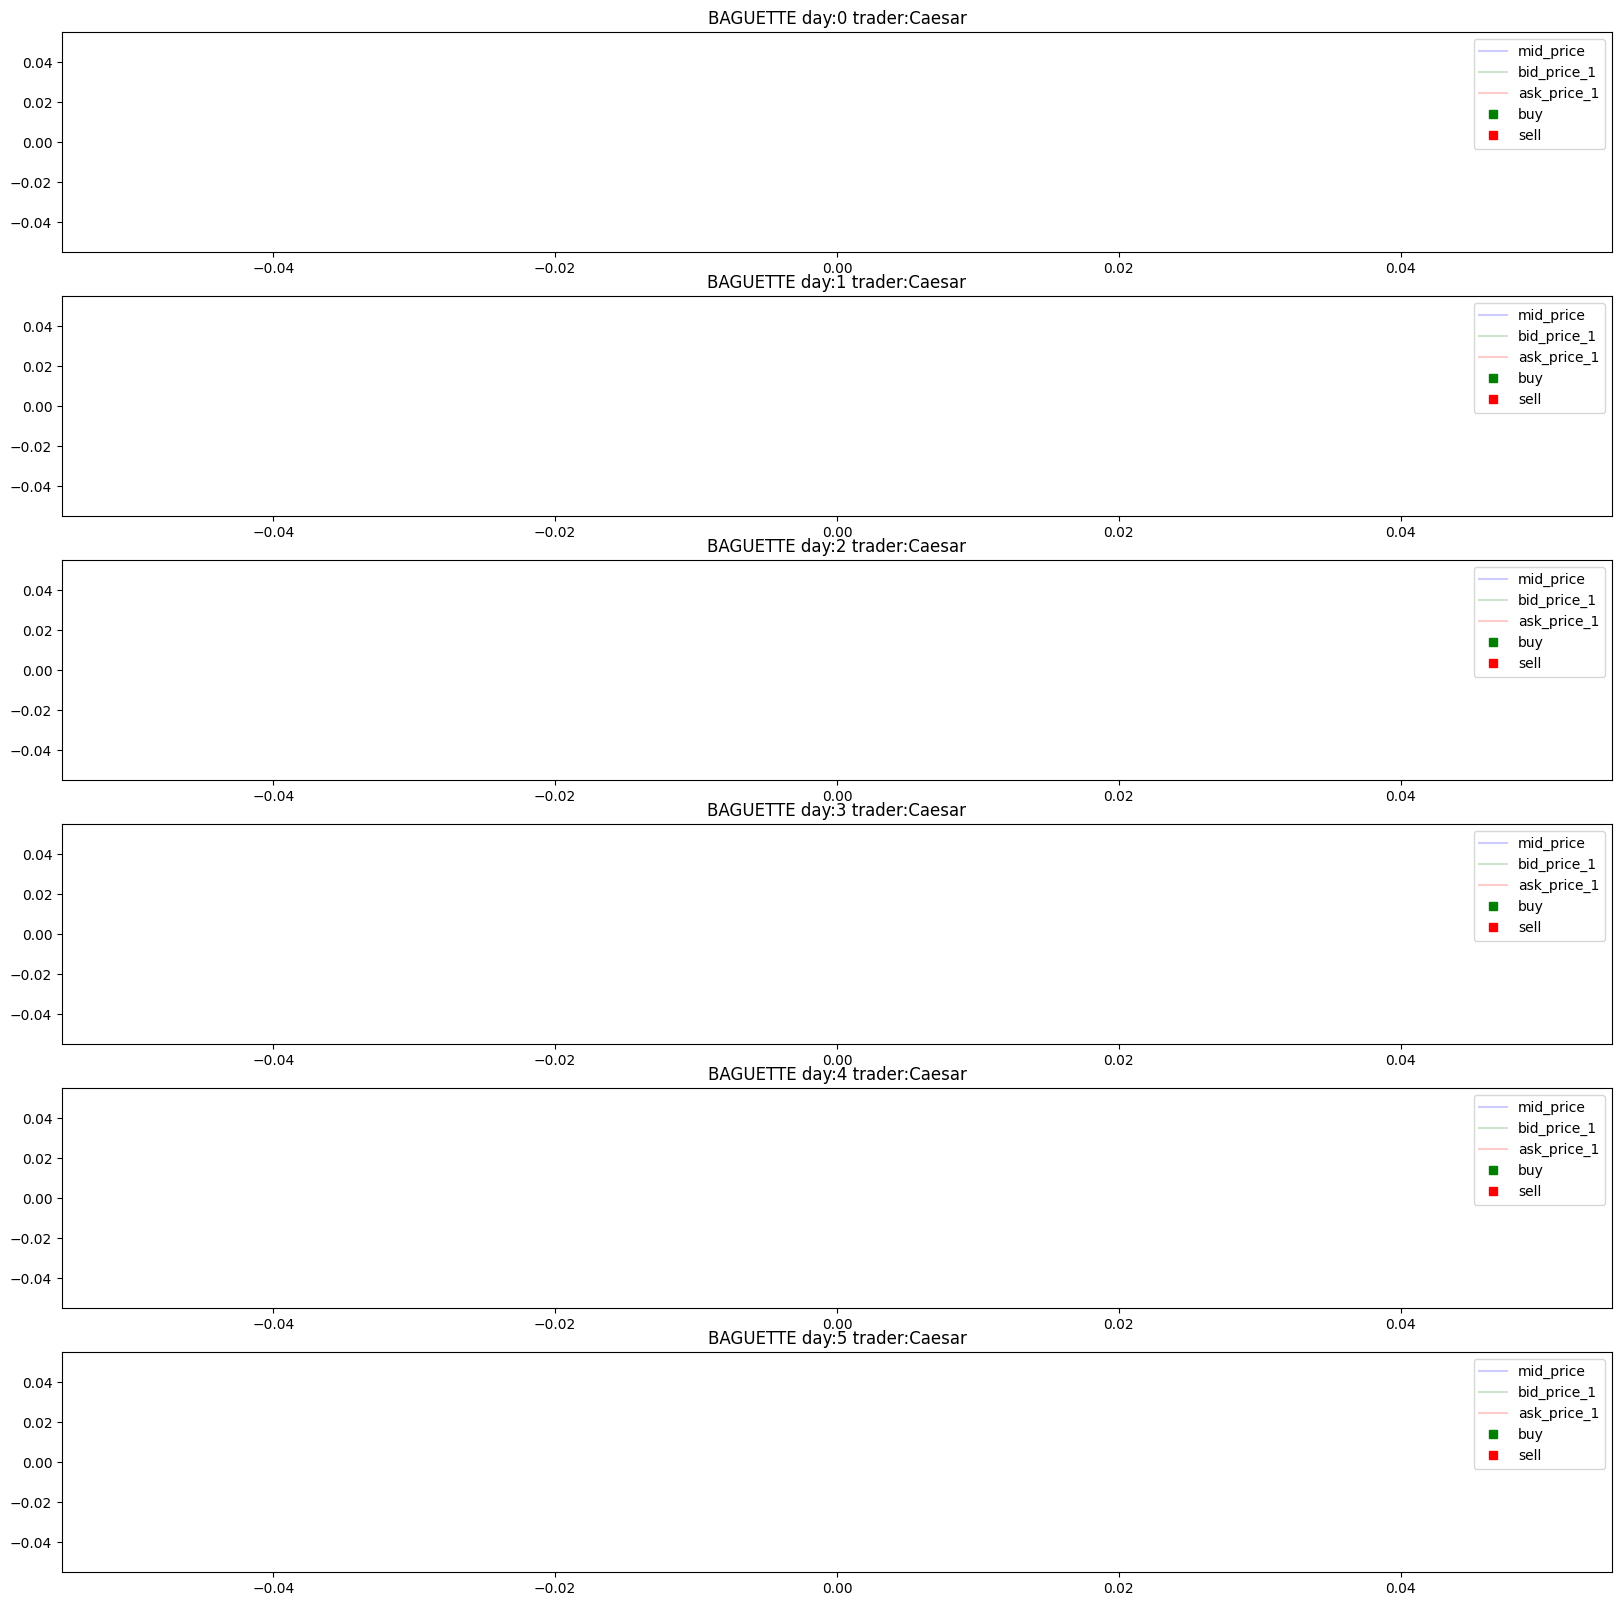

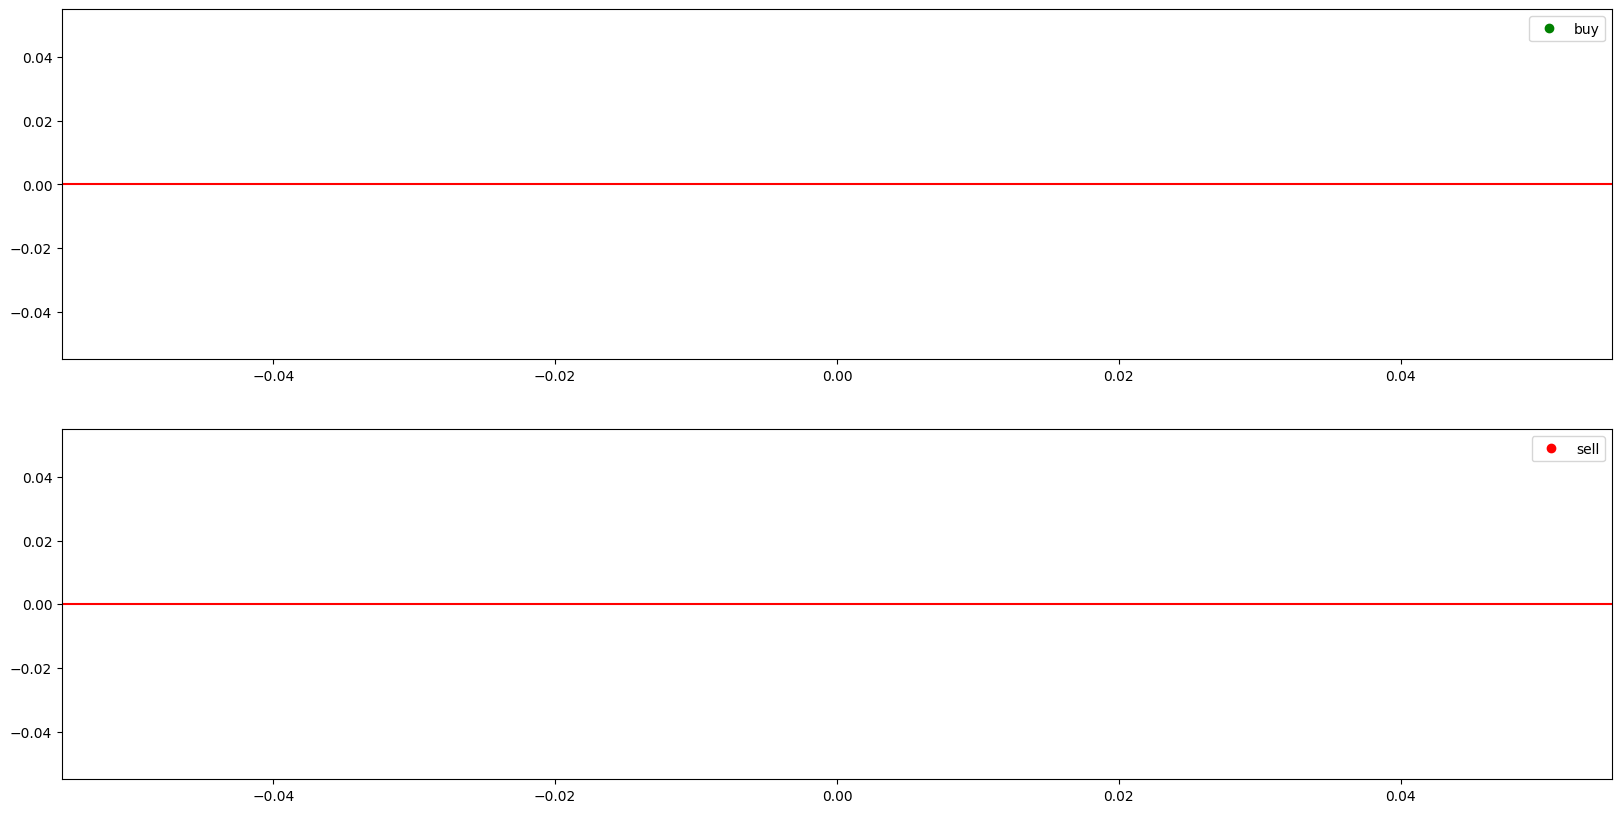

In [26]:
### Caesar perform best on BAGUETTE

plot_trade_on_orderbook(prices,trades,'BAGUETTE','Caesar')
plot_traded_price_vs_mid(prices,trades,'BAGUETTE','Caesar')

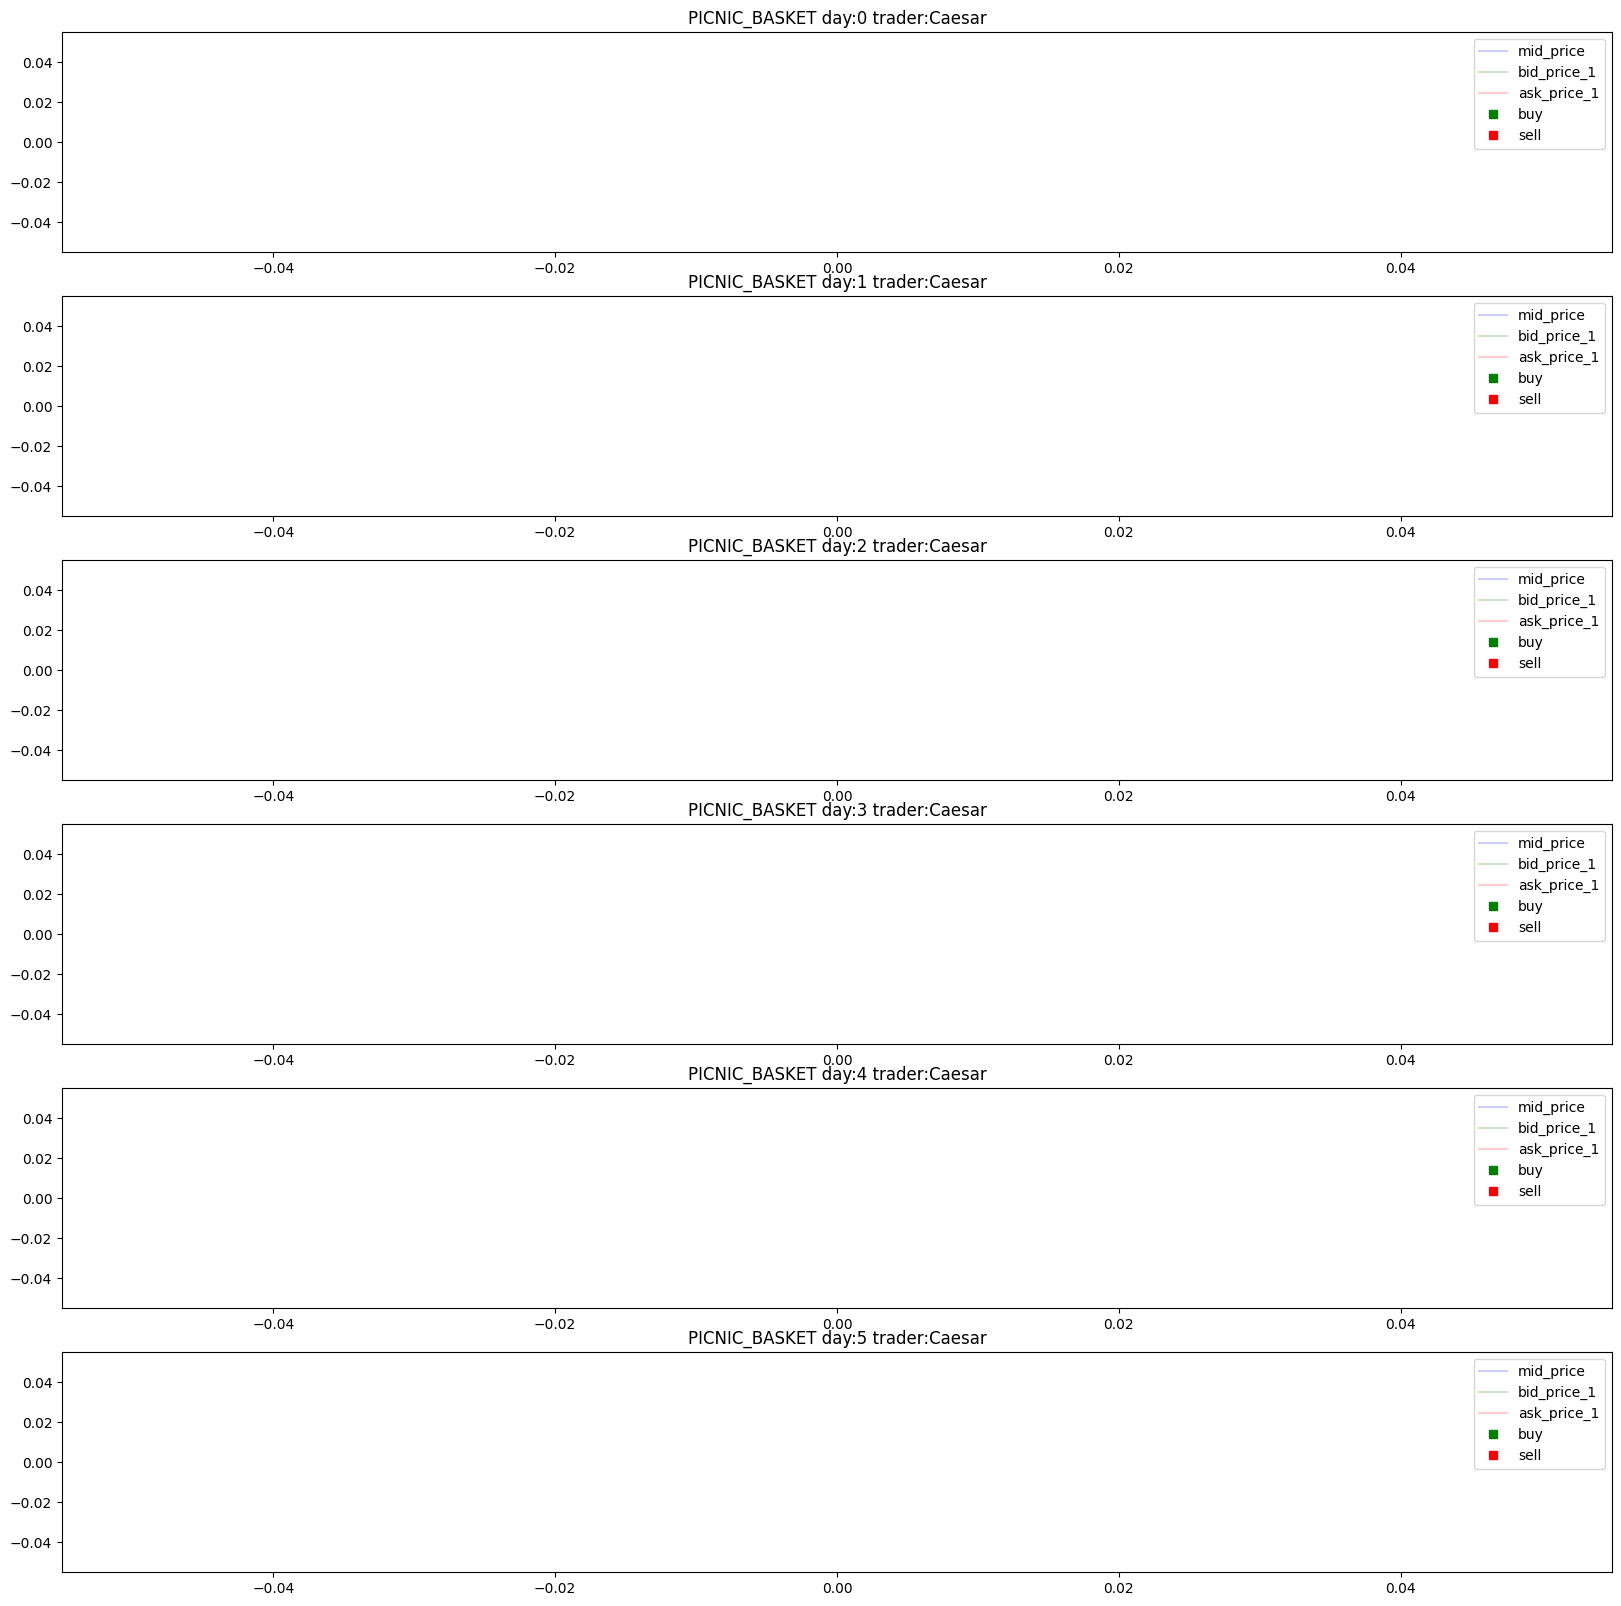

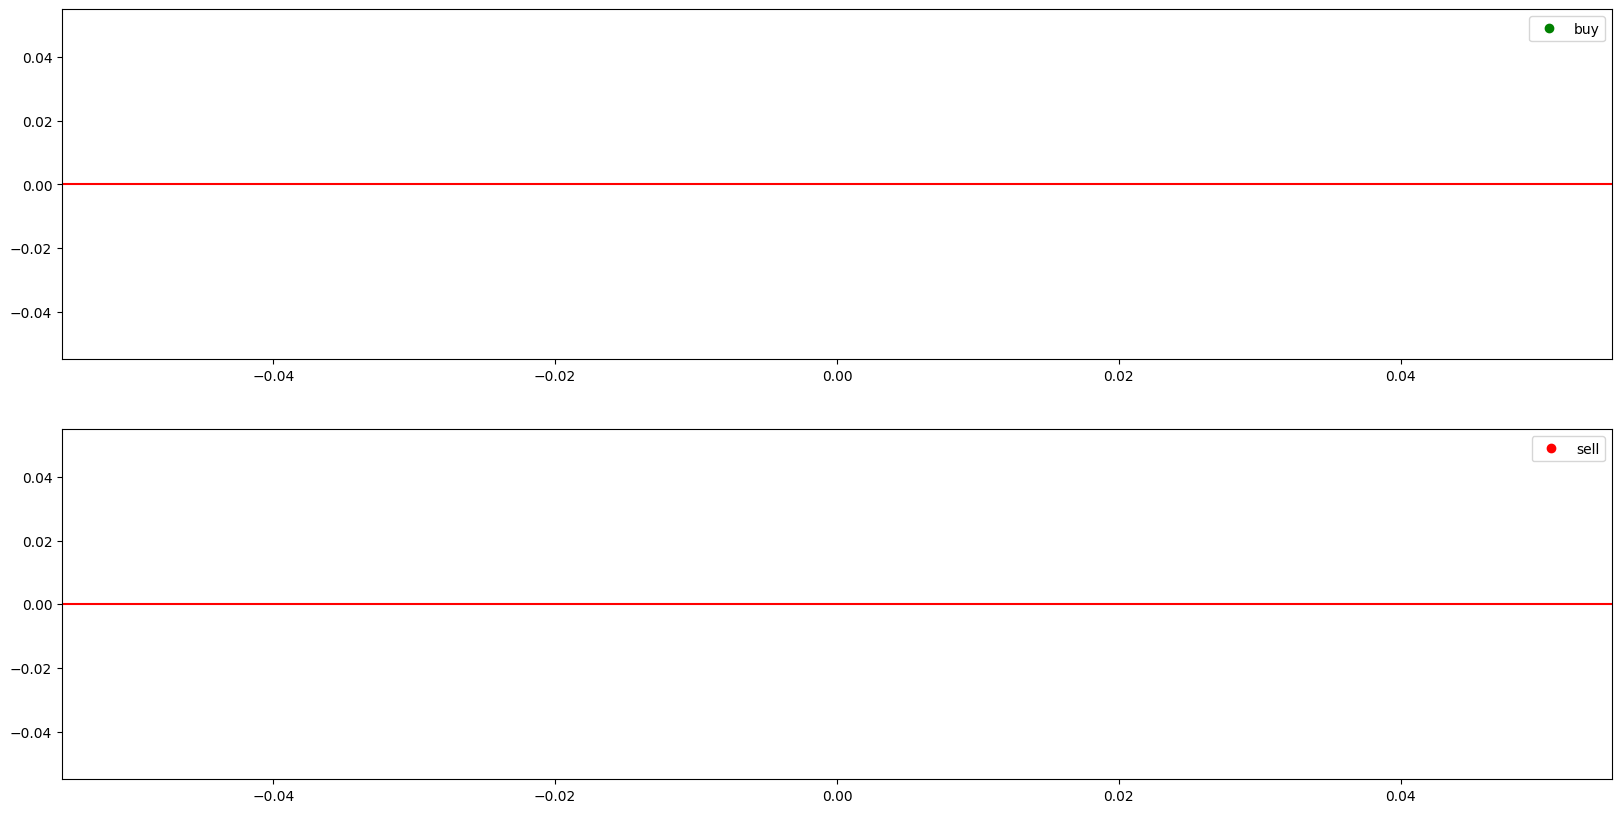

In [27]:
### Caesar perform best on PICNIC_BASKETS

plot_trade_on_orderbook(prices,trades,'PICNIC_BASKET','Caesar')
plot_traded_price_vs_mid(prices,trades,'PICNIC_BASKET','Caesar')

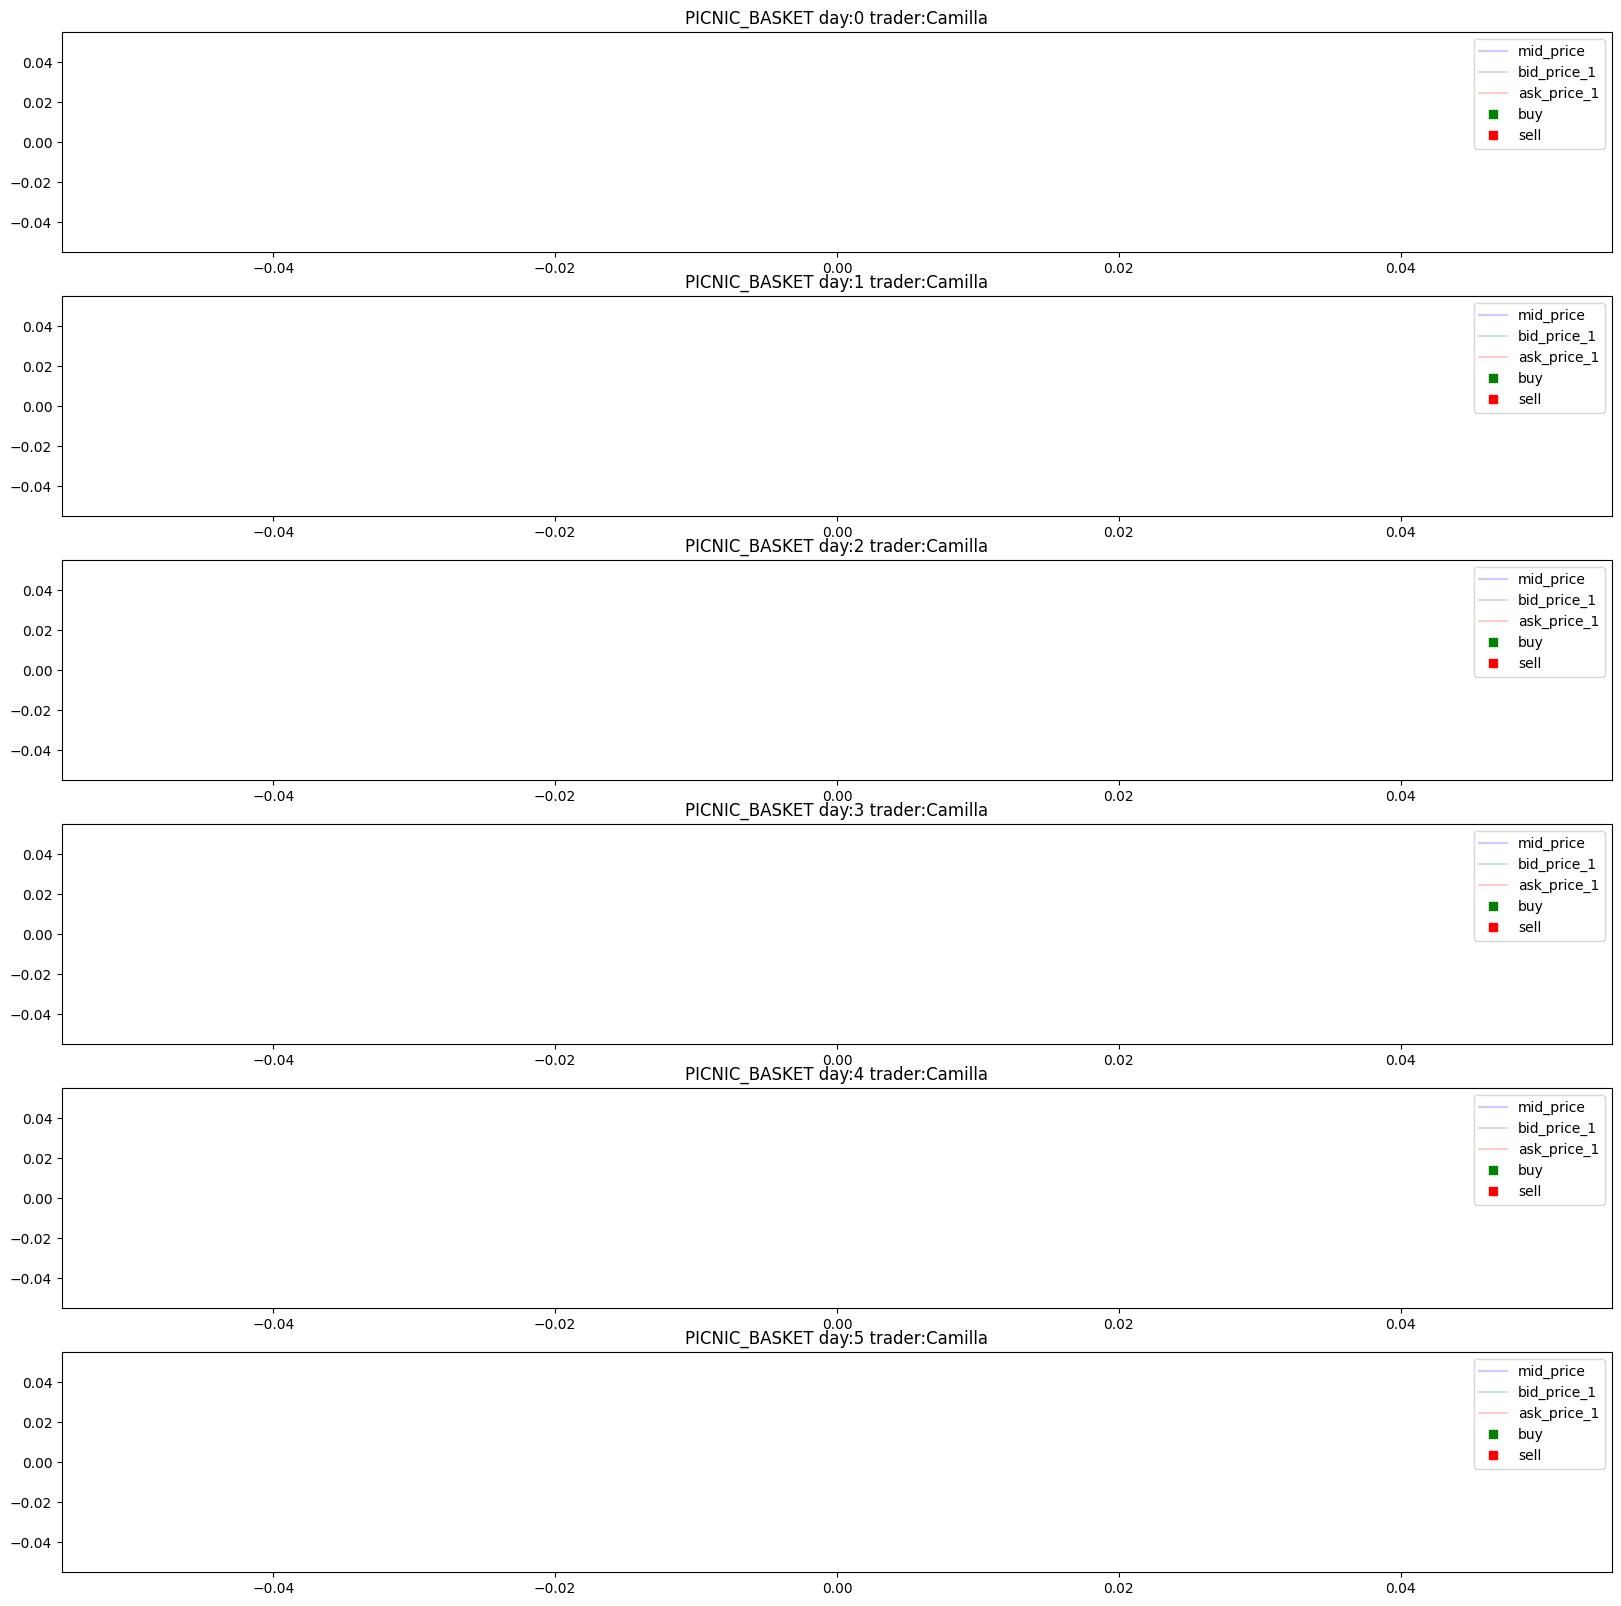

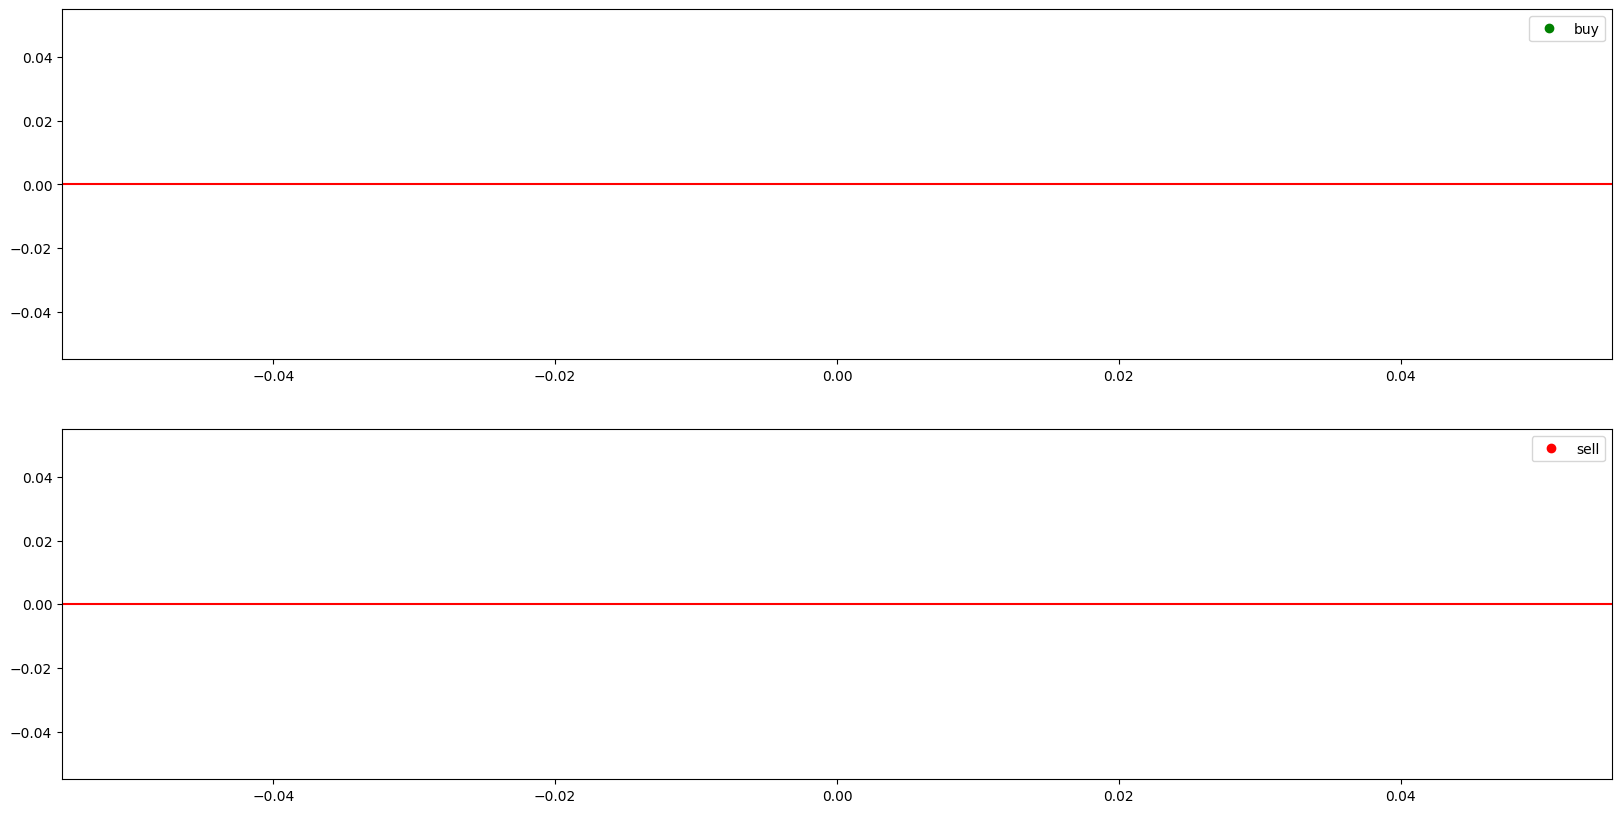

In [28]:
### Camilla on UKULELE
plot_trade_on_orderbook(prices,trades,'PICNIC_BASKET','Camilla')
plot_traded_price_vs_mid(prices,trades,'PICNIC_BASKET','Camilla')

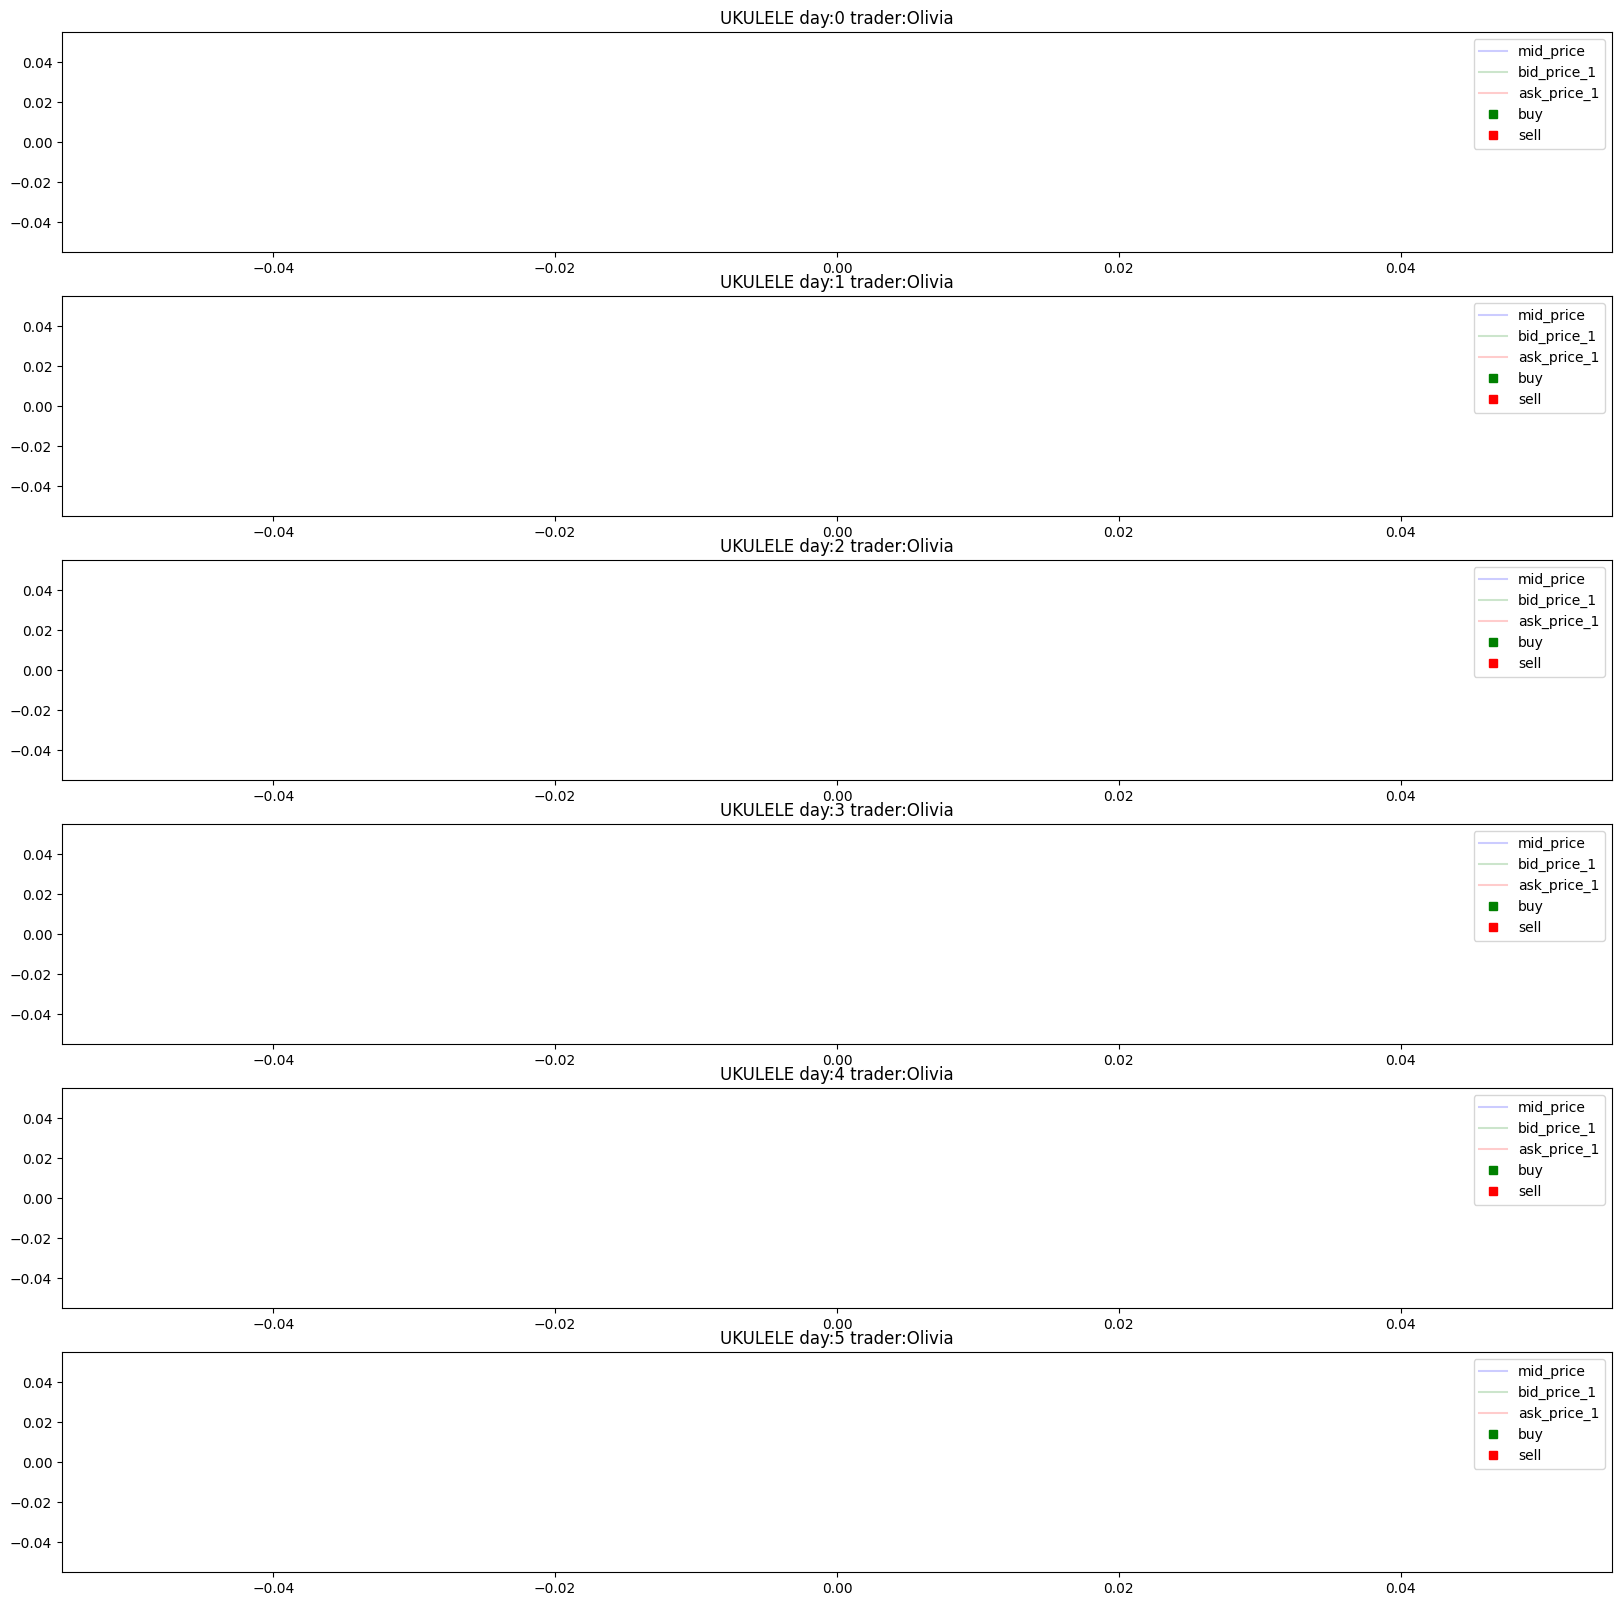

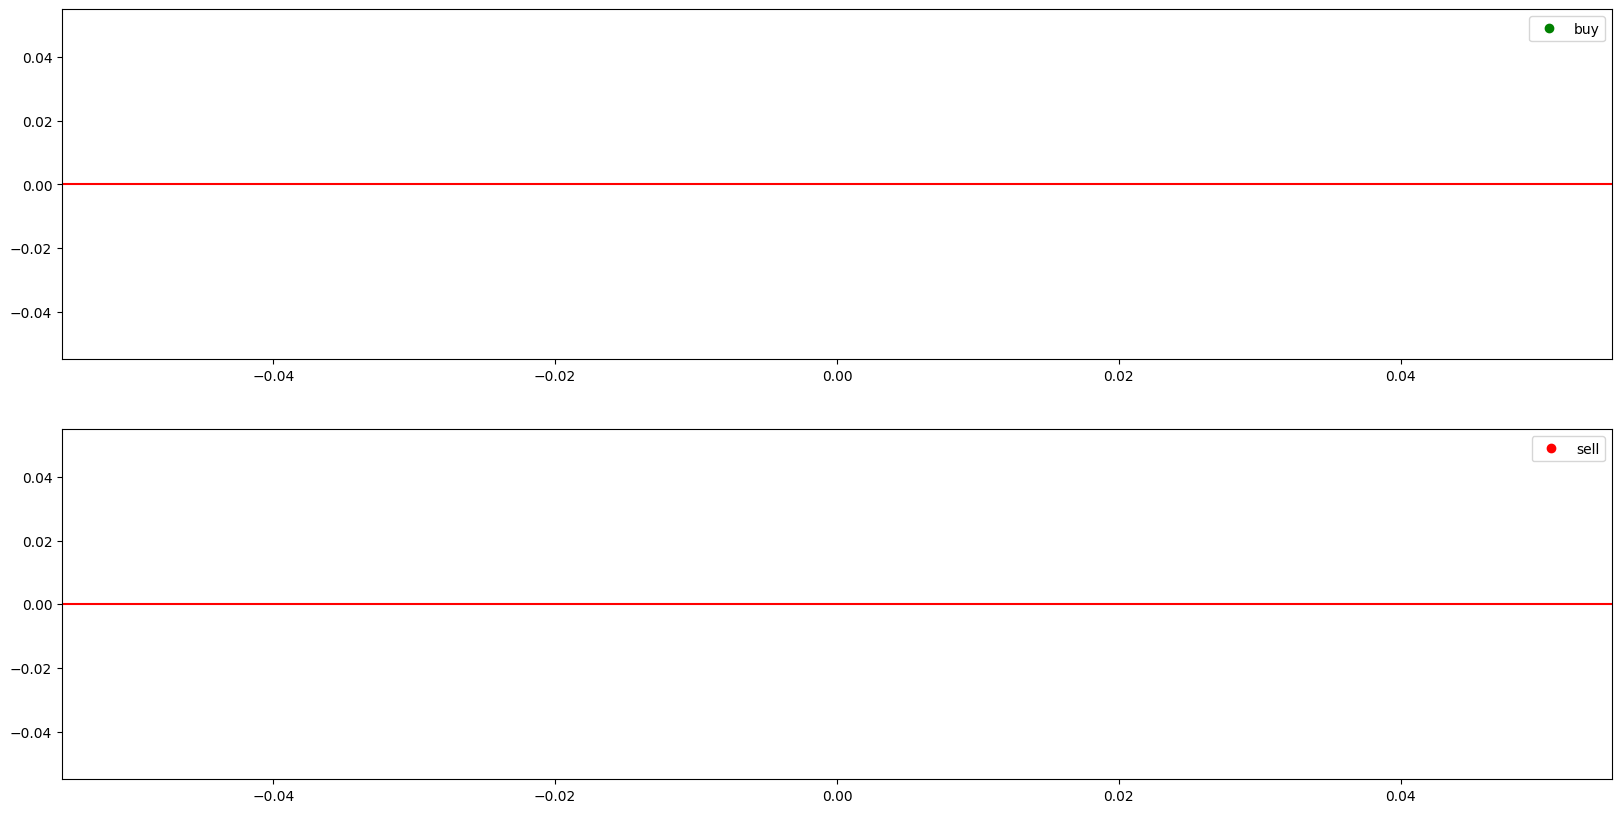

In [29]:
plot_trade_on_orderbook(prices,trades,'UKULELE','Olivia')
plot_traded_price_vs_mid(prices,trades,'UKULELE','Olivia')

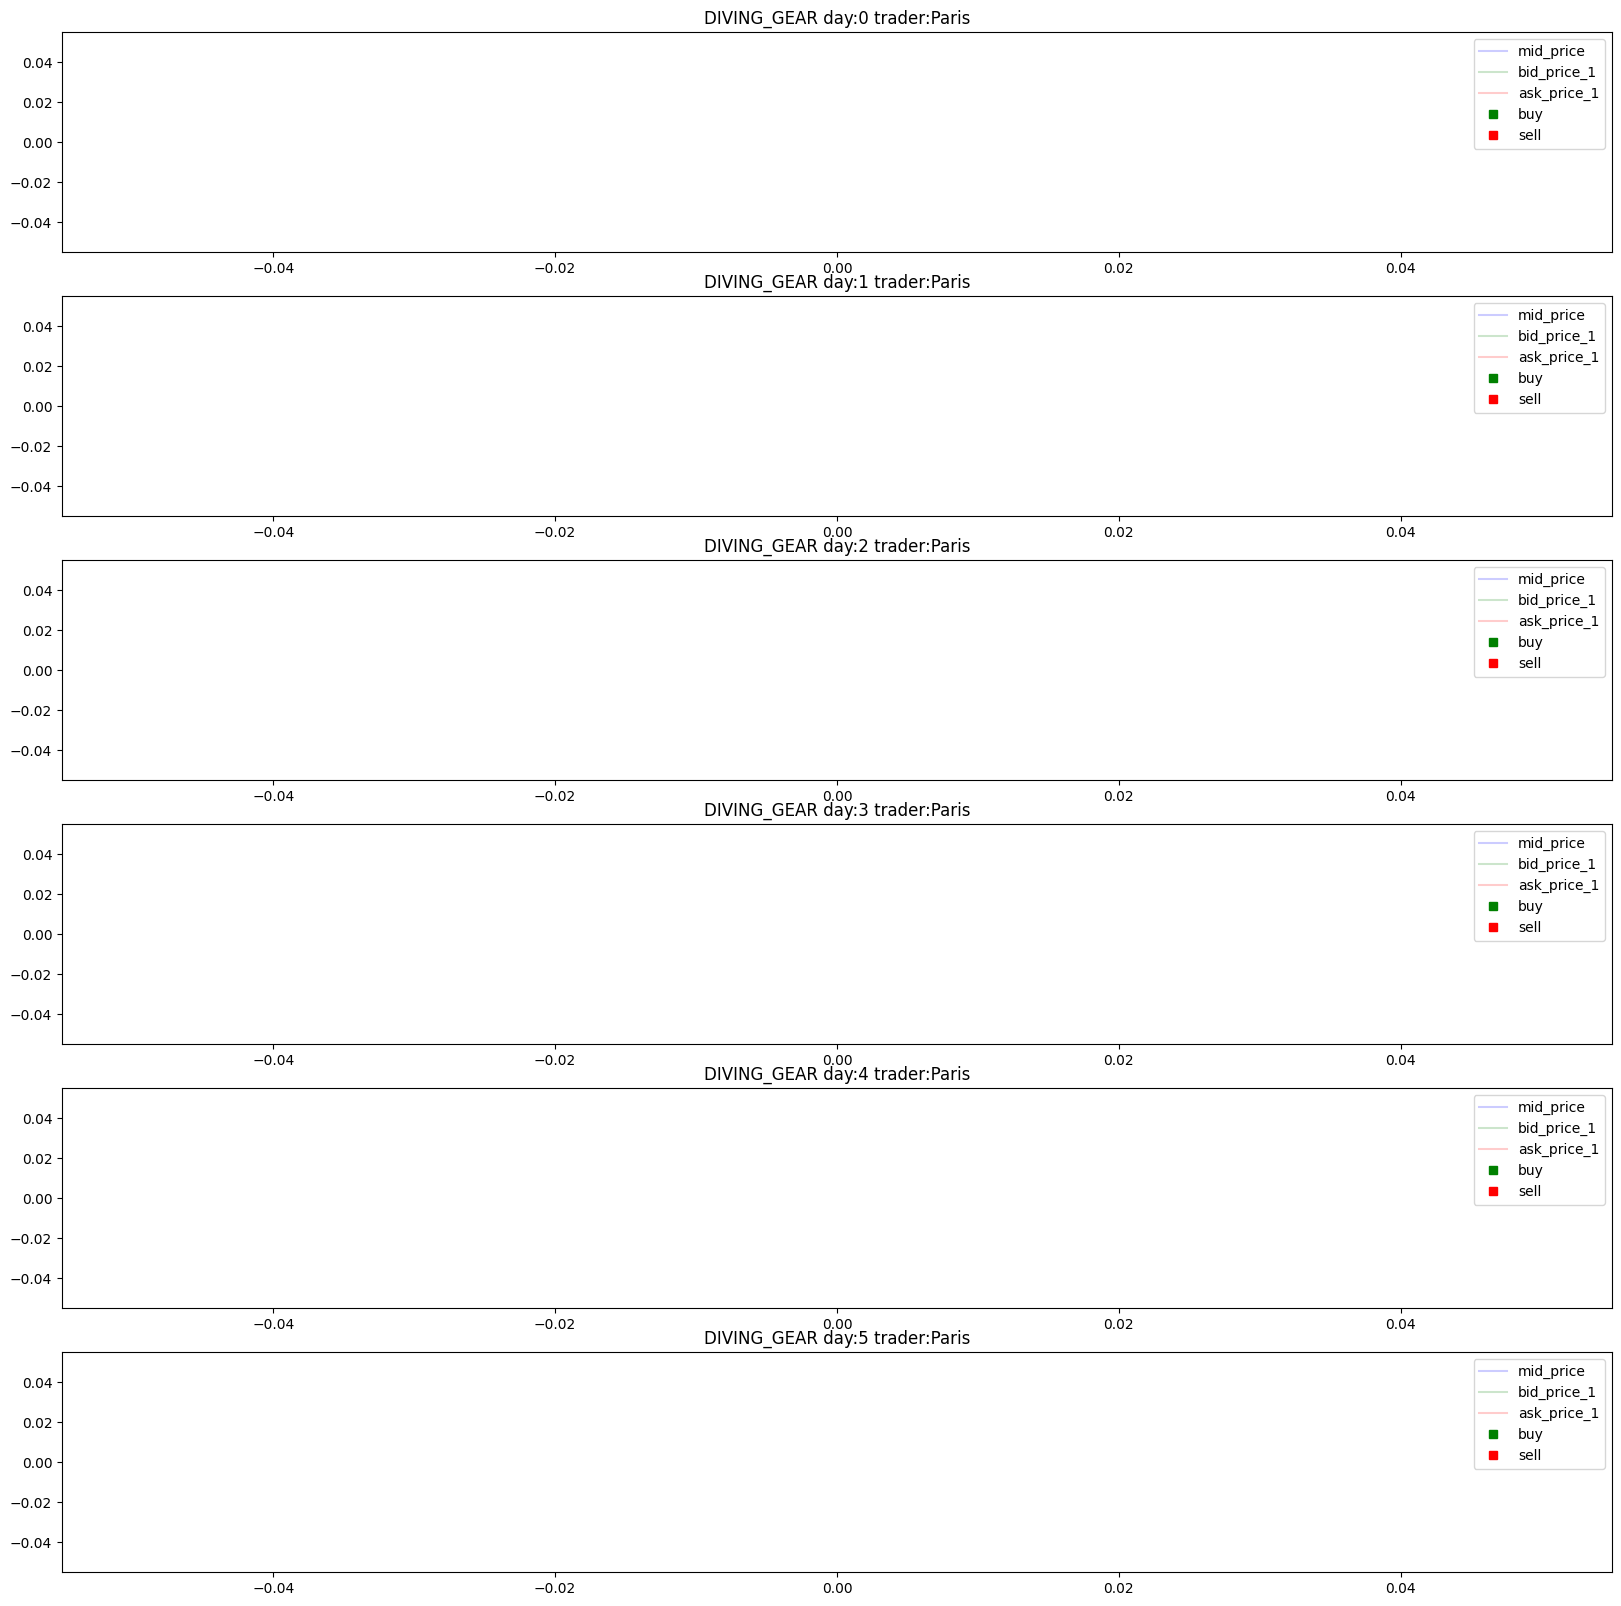

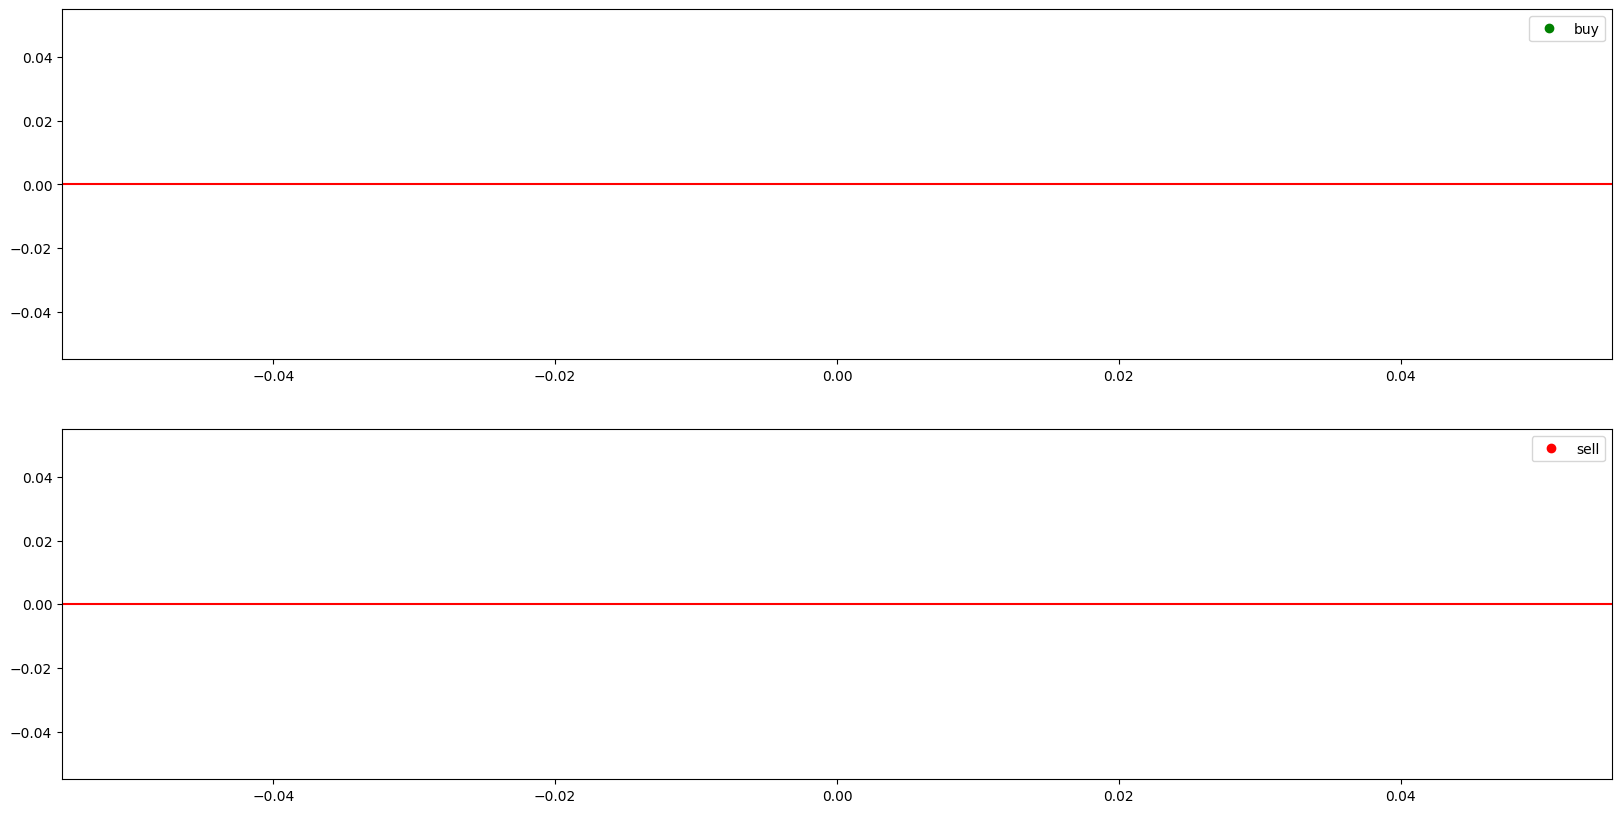

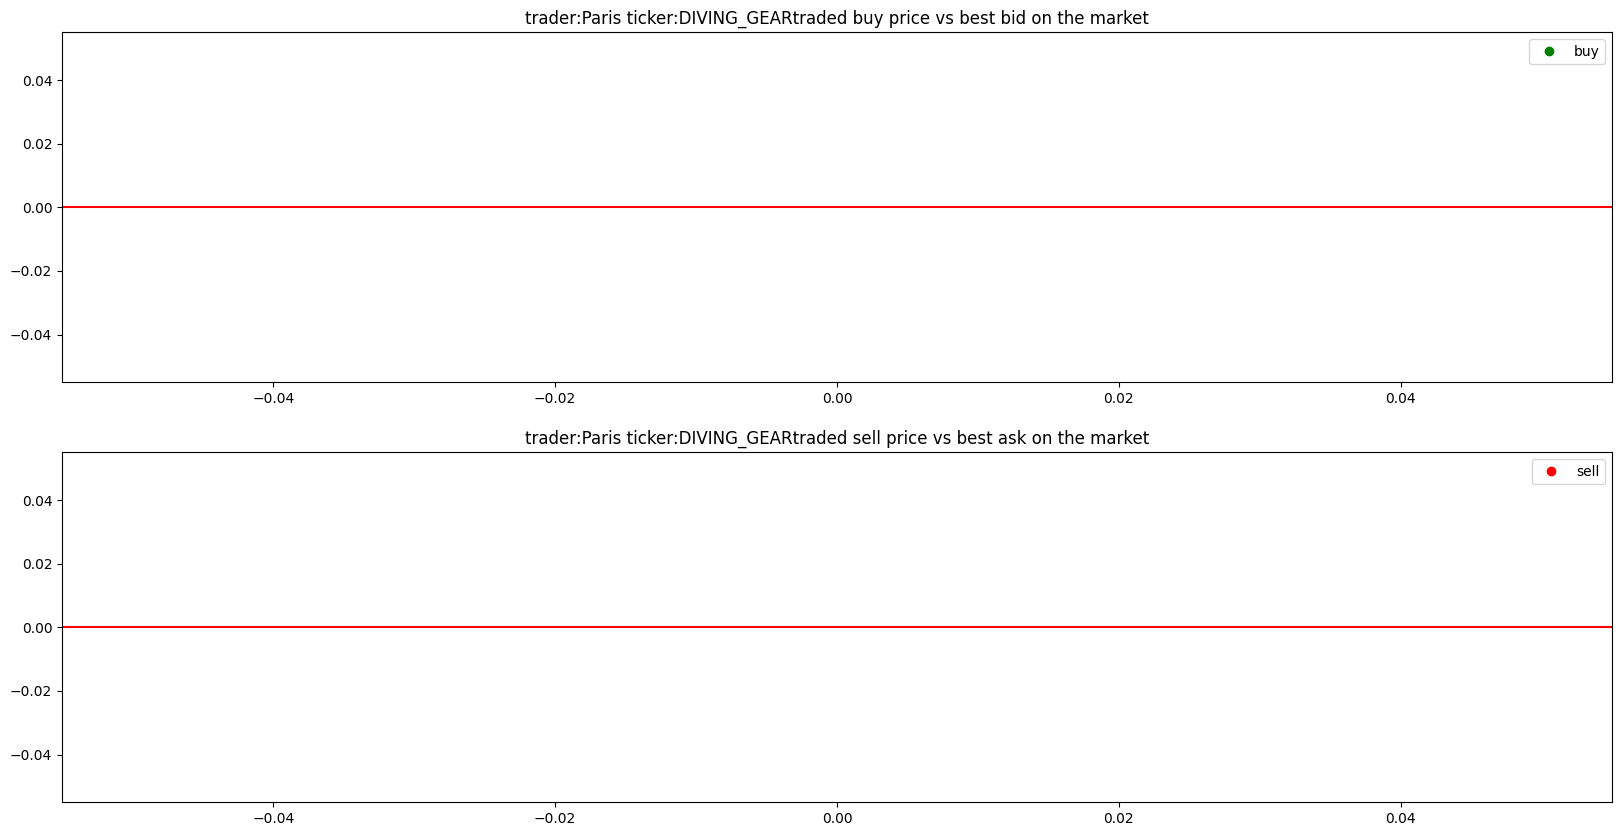

In [30]:
plot_trade_on_orderbook(prices,trades,'DIVING_GEAR','Paris')
plot_traded_price_vs_mid(prices,trades,'DIVING_GEAR','Paris')
plot_traded_price_vs_best(prices,trades,'DIVING_GEAR','Paris')
